# ------------------------------------------------------------------------------------
# DEMAND – DRIVEN SUPPLY OPTIMIZATION OF NOODLES – LEVERAGING DATA ANALYTICS TO ENHANCE INVENTORY MANAGEMENT AND PROFITABILITY FOR FMCG COMPANY 
# ------------------------------------------------------------------------------------

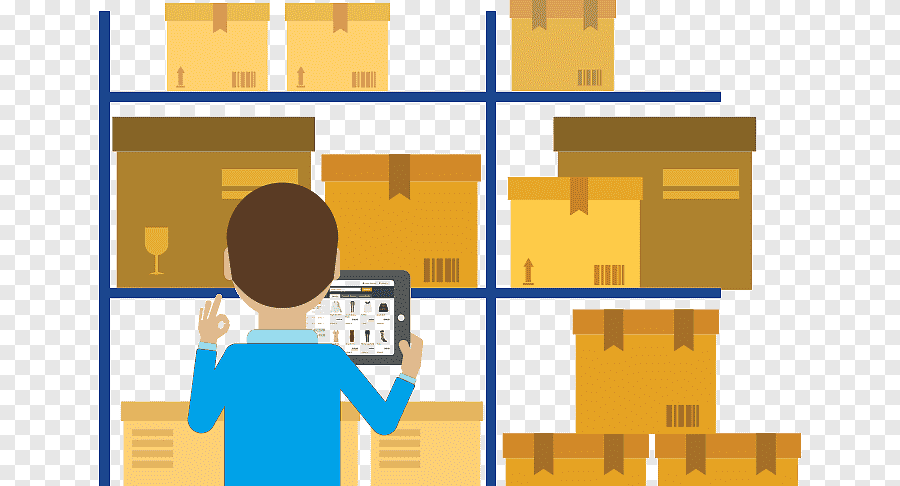

#### Author : CHANDAN D. CHAUDHARI

#### GitHub : https://github.com/chandanc5525
# ------------------------------------------------------------------------------------

### Installing Neccessory Packages 

In [1]:
!pip install researchpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install factor_analyzer

Defaulting to user installation because normal site-packages is not writeable


## MACHINE LEARNING MODEL BUILDING 


### Step 1 :  Importing Python Neccesory Libraries

In [3]:

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# Importing scipy.stats library 
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import researchpy as rp

# Import Data visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')


### Step 2 :  Importing Dataset Using Pandas Function

In [4]:
URL = 'https://raw.githubusercontent.com/chandanc5525/SupplyChain_BusinessModel/main/Dataset/SCM.csv'
df = pd.read_csv(URL)
# Checking Sample Dataset
df.sample(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
13075,WH_113075,EID_63075,Rural,Mid,North,Zone 3,1,0,2,5390,...,0,189,29.0,NaN,7,0,A,3,27,9114
10714,WH_110714,EID_60714,Rural,Large,West,Zone 5,5,0,2,5600,...,1,69,20.0,1999.0,24,0,B+,4,25,30145
11458,WH_111458,EID_61458,Rural,Mid,West,Zone 3,7,0,4,4675,...,1,193,28.0,1997.0,27,0,A,2,19,37097
11799,WH_111799,EID_61799,Rural,Large,North,Zone 6,6,0,2,6988,...,1,56,29.0,2023.0,0,0,NaN,0,6,7147
1496,WH_101496,EID_51496,Rural,Small,West,Zone 6,0,0,2,3557,...,1,175,31.0,NaN,23,0,B+,3,9,28145
220,WH_100220,EID_50220,Rural,Large,West,Zone 6,7,0,3,5086,...,1,228,32.0,2005.0,28,0,C,2,6,37072
13461,WH_113461,EID_63461,Rural,Small,North,Zone 6,5,3,3,5111,...,1,134,NaN,NaN,0,0,NaN,0,8,3121
65,WH_100065,EID_50065,Rural,Large,West,Zone 5,5,0,4,5772,...,1,181,32.0,1999.0,25,0,B+,3,25,28143
13327,WH_113327,EID_63327,Rural,Small,West,Zone 6,5,0,4,4162,...,1,74,NaN,2013.0,21,1,C,5,9,30128
6921,WH_106921,EID_56921,Urban,Large,North,Zone 5,1,0,4,4404,...,1,59,23.0,NaN,15,0,C,5,25,19144


### Splitting dataset into Numerical and Categorical 

In [5]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

### Step 3 :  Checking Dataset Information

In [6]:
df.shape

(22150, 24)

In [7]:
print('*'*60)
df.info()
print('*'*60)

************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12 

In [8]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [9]:
print('The Missing Percentage Values in the Dataset :')
print('*'*60)
print(round(df.isnull().sum()/len(df)*100,2))
print('*'*60)

The Missing Percentage Values in the Dataset :
************************************************************
Ware_house_ID                    0.00
WH_Manager_ID                    0.00
Location_type                    0.00
WH_capacity_size                 0.00
zone                             0.00
WH_regional_zone                 0.00
num_refill_req_l3m               0.00
transport_issue_l1y              0.00
Competitor_in_mkt                0.00
retail_shop_num                  0.00
wh_owner_type                    0.00
distributor_num                  0.00
flood_impacted                   0.00
flood_proof                      0.00
electric_supply                  0.00
dist_from_hub                    0.00
workers_num                      3.96
wh_est_year                     47.61
storage_issue_reported_l3m       0.00
temp_reg_mach                    0.00
approved_wh_govt_certificate     3.63
wh_breakdown_l3m                 0.00
govt_check_l3m                   0.00
product_wg_ton    

In [10]:
rp.summary_cont(numeric_data)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,num_refill_req_l3m,22150.0,4.0970,2.6063,0.0175,4.0627,4.1313
1,transport_issue_l1y,22150.0,0.7772,1.2017,0.0081,0.7614,0.7930
2,Competitor_in_mkt,22150.0,3.1039,1.1429,0.0077,3.0889,3.1190
3,retail_shop_num,22150.0,4983.1157,1050.6342,7.0593,4969.2789,4996.9525
4,distributor_num,22150.0,42.3870,16.0577,0.1079,42.1755,42.5985
5,flood_impacted,22150.0,0.0987,0.2983,0.0020,0.0948,0.1026
6,flood_proof,22150.0,0.0545,0.2270,0.0015,0.0515,0.0575
7,electric_supply,22150.0,0.6561,0.4750,0.0032,0.6498,0.6623
8,dist_from_hub,22150.0,163.6137,62.6607,0.4210,162.7885,164.4390
9,workers_num,21273.0,28.9364,7.8434,0.0538,28.8310,29.0418


In [11]:
rp.summarize(numeric_data)

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,num_refill_req_l3m,22150,4.097,4.0,6.7927,2.6063,0.0175,num_refill_req_l3m
1,transport_issue_l1y,22150,0.7772,0.0,1.4442,1.2017,0.0081,transport_issue_l1y
2,Competitor_in_mkt,22150,3.1039,3.0,1.3062,1.1429,0.0077,Competitor_in_mkt
3,retail_shop_num,22150,4983.1157,4859.0,1103832.2737,1050.6342,7.0593,retail_shop_num
4,distributor_num,22150,42.387,42.0,257.8507,16.0577,0.1079,distributor_num
5,flood_impacted,22150,0.0987,0.0,0.089,0.2983,0.002,flood_impacted
6,flood_proof,22150,0.0545,0.0,0.0515,0.227,0.0015,flood_proof
7,electric_supply,22150,0.6561,1.0,0.2257,0.475,0.0032,electric_supply
8,dist_from_hub,22150,163.6137,164.0,3926.3644,62.6607,0.421,dist_from_hub
9,workers_num,21273,28.9364,28.0,61.5194,7.8434,0.0538,workers_num


In [12]:
categorical_data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [13]:
rp.summary_cat(categorical_data[['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate']])

,Variable,Outcome,Count,Percent
0,Location_type,Rural,20334,91.80
1,,Urban,1816,8.20
2,WH_capacity_size,Large,8968,40.49
3,,Mid,8902,40.19
4,,Small,4280,19.32
5,zone,North,9069,40.94
6,,West,7055,31.85
7,,South,5644,25.48
8,,East,382,1.72
9,WH_regional_zone,Zone 6,7376,33.30


### Obervations :

1. The dataset contains total 22150 rows and 24 columns.

2. product_wg_tons is a target column, Rest other columns are independent columns

3. workers_num,wh_est_year,approved_wh_govt_certificate these columns have missing values as mentioned in above dataset information.

4. If we look at the dataset, East zone has very less data information i.e. 1.72% 

### Step 4 : EDA

In [14]:
refill_request = rp.crosstab(df['zone'],df['num_refill_req_l3m'])
refill_request

num_refill_req_l3m                                      \
num_refill_req_l3m                  0     1     2     3     4     5     6   
zone                                                                        
East                               52    38    21    52    48    37    37   
North                            1068  1066   656  1066  1053  1072   999   
South                             665   656   423   661   598   639   637   
West                              798   743   508   839   814   903   818   
All                              2583  2503  1608  2618  2513  2651  2491   

                                       
num_refill_req_l3m     7     8    All  
zone                                   
East                  46    51    382  
North               1008  1081   9069  
South                689   676   5644  
West                 798   834   7055  
All                 2541  2642  22150

In [15]:
transport_issues = rp.crosstab(df['zone'],df['transport_issue_l1y'])
transport_issues

transport_issue_l1y                                   
transport_issue_l1y                   0     1     2     3    4    5    All
zone                                                                      
East                                235    66    30    37   10    4    382
North                              5436  1733   824   660  293  123   9069
South                              3419  1061   496   395  190   83   5644
West                               4358  1267   597   541  187  105   7055
All                               13448  4127  1947  1633  680  315  22150

In [16]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [17]:
demand_pattern = df.groupby(['num_refill_req_l3m','WH_capacity_size','zone']).size().reset_index().rename(columns= {0:"Count"}) 

In [18]:
print(demand_pattern)

     num_refill_req_l3m WH_capacity_size   zone  Count
0                     0            Large   East      7
1                     0            Large  North    541
2                     0            Large  South    173
3                     0            Large   West    286
4                     0              Mid   East     29
..                  ...              ...    ...    ...
103                   8              Mid   West    397
104                   8            Small   East     12
105                   8            Small  North    191
106                   8            Small  South    169
107                   8            Small   West    116

[108 rows x 4 columns]


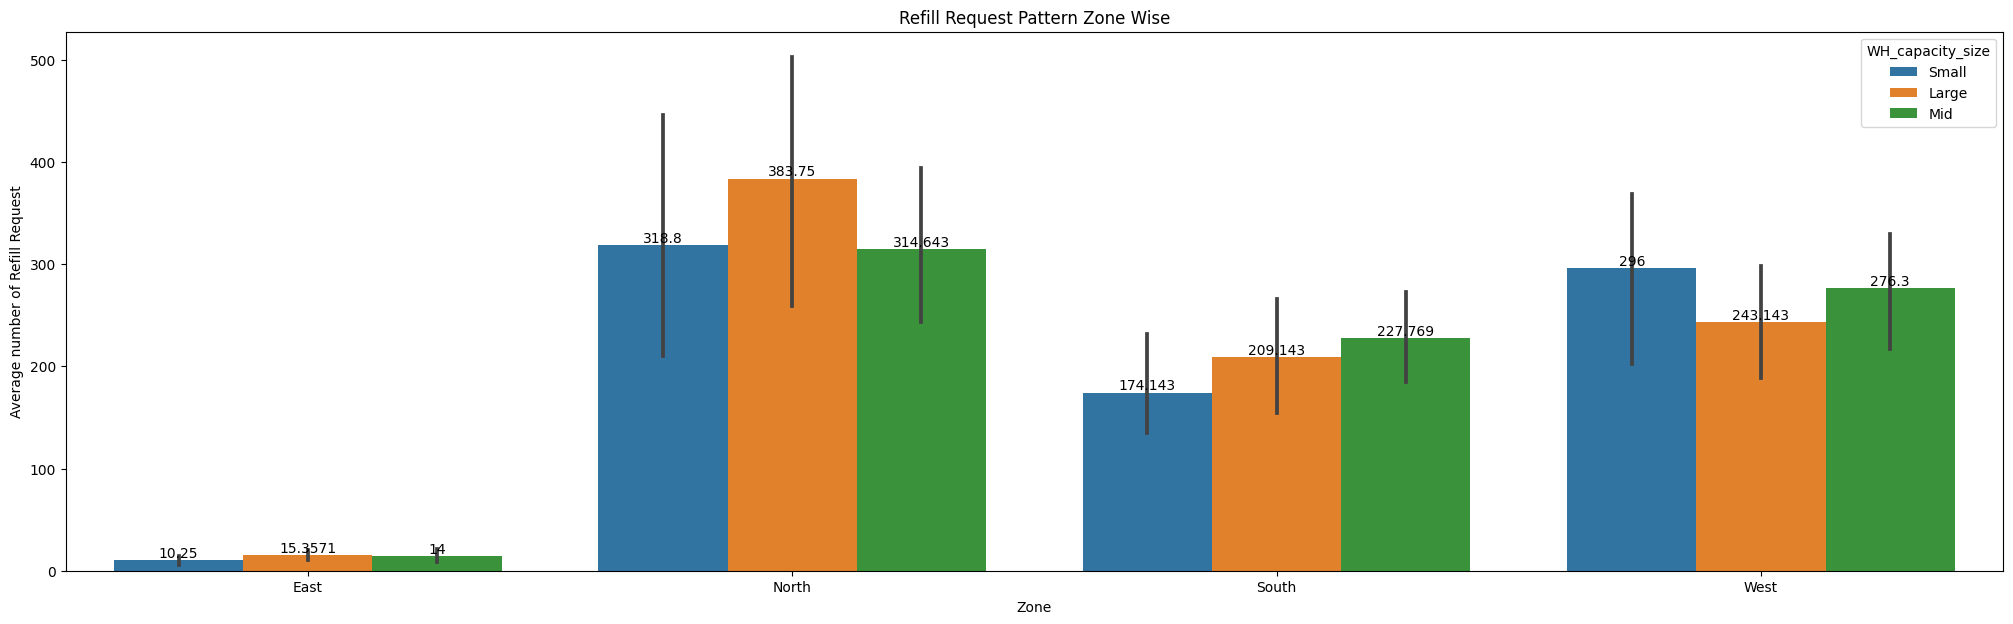

In [19]:
# Analysis Based on Refill Request Zone Wise
plt.figure(figsize = (25,7))
ax = sns.barplot(y = demand_pattern['Count'],x = demand_pattern['zone'],hue=df['WH_capacity_size'])
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Zone')
plt.ylabel('Average number of Refill Request')
plt.title('Refill Request Pattern Zone Wise')
plt.show()

### Barplot Visualization

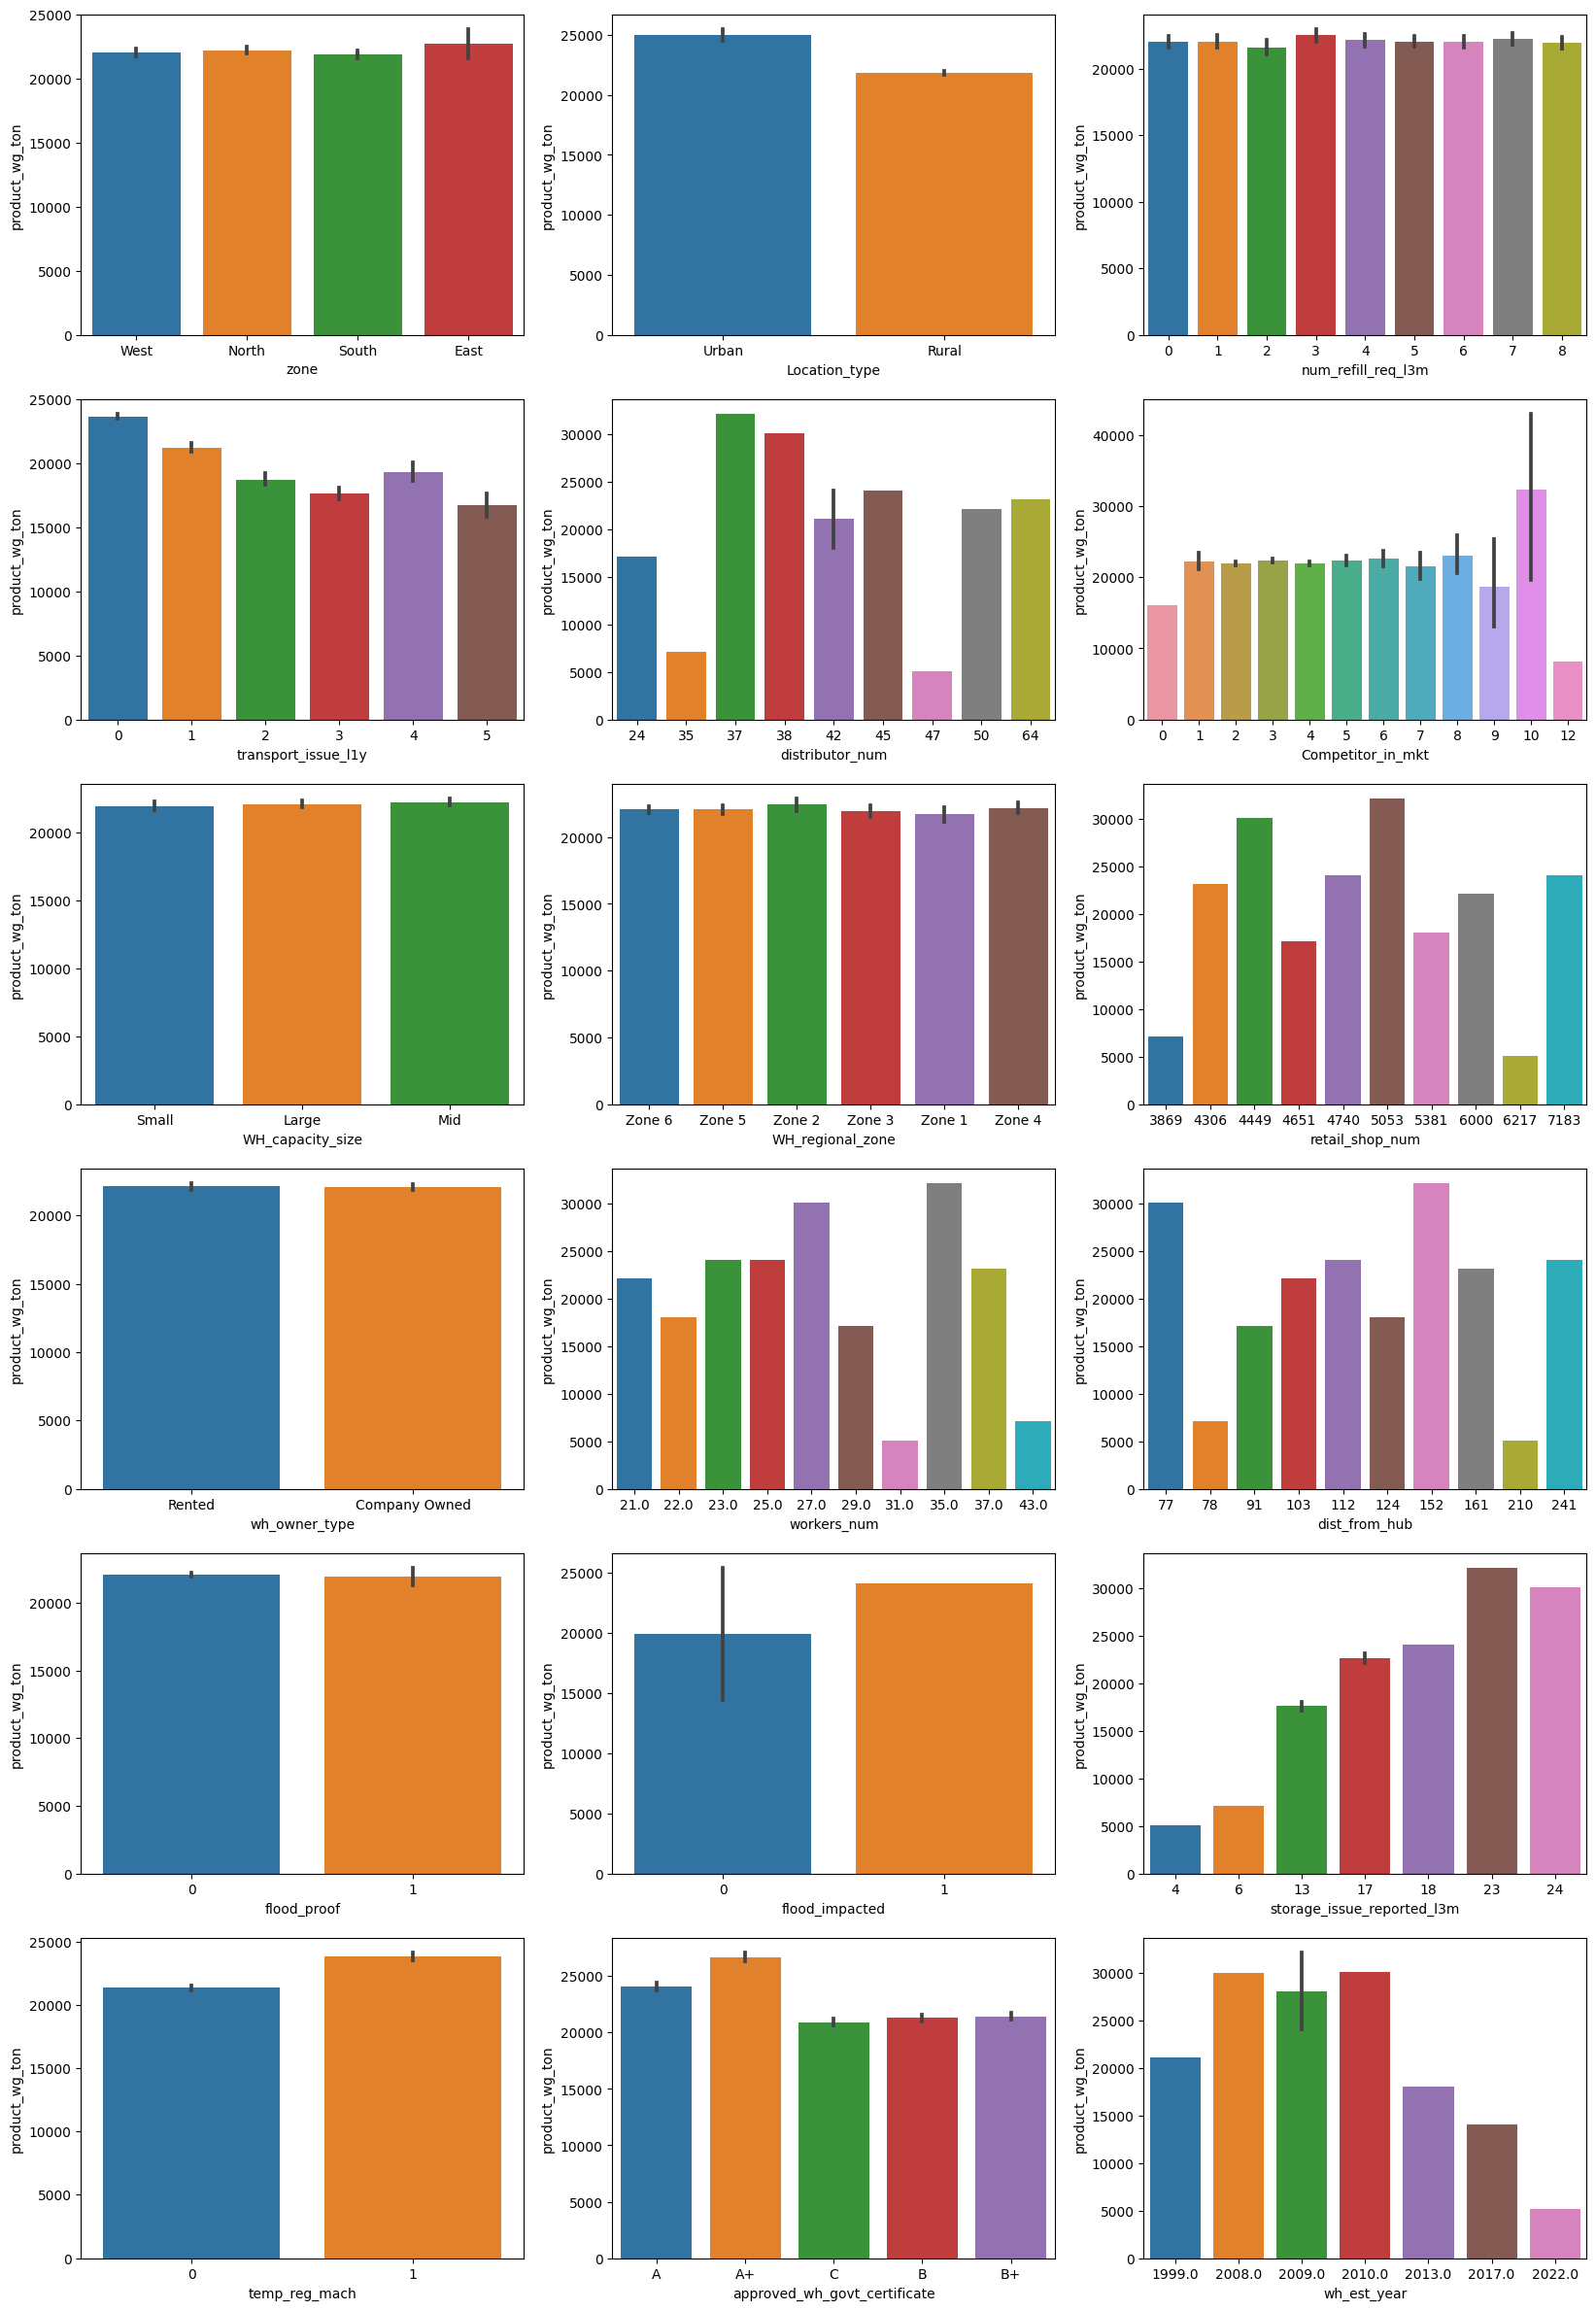

In [20]:
fig,axes = plt.subplots(6,3,figsize = (20,30))
sns.barplot(ax = axes[0][0],x = df['zone'] , y = df['product_wg_ton'])
sns.barplot(ax = axes[0][1],x = df['Location_type'] , y = df['product_wg_ton'])
sns.barplot(ax = axes[0][2],x = df['num_refill_req_l3m'] , y = df['product_wg_ton'])
sns.barplot(ax = axes[1][0],x = df['transport_issue_l1y'] , y = df['product_wg_ton'])
sns.barplot(ax = axes[1][1],x = df['distributor_num'][:10] , y = df['product_wg_ton'])
sns.barplot(ax = axes[1][2],x = df['Competitor_in_mkt'] , y = df['product_wg_ton'])
sns.barplot(ax = axes[2][0],x = df['WH_capacity_size'] , y = df['product_wg_ton'])
sns.barplot(ax = axes[2][1],x = df['WH_regional_zone'] , y = df['product_wg_ton'])
sns.barplot(ax = axes[2][2],x = df['retail_shop_num'][:10] , y = df['product_wg_ton'])
sns.barplot(ax = axes[3][0],x = df['wh_owner_type'] , y = df['product_wg_ton'])
sns.barplot(ax = axes[3][1],x = df['workers_num'][:10] , y = df['product_wg_ton'])
sns.barplot(ax = axes[3][2],x = df['dist_from_hub'][:10] , y = df['product_wg_ton'])
sns.barplot(ax = axes[4][0],x = df['flood_proof'] , y = df['product_wg_ton'])
sns.barplot(ax = axes[4][1],x = df['flood_impacted'][:10] , y = df['product_wg_ton'])
sns.barplot(ax = axes[4][2],x = df['storage_issue_reported_l3m'][:10] , y = df['product_wg_ton'])
sns.barplot(ax = axes[5][0],x = df['temp_reg_mach'] , y = df['product_wg_ton'])
sns.barplot(ax = axes[5][1],x = df['approved_wh_govt_certificate'], y = df['product_wg_ton'])
sns.barplot(ax = axes[5][2],x = df['wh_est_year'][:15] , y = df['product_wg_ton'])
plt.show()

### Count Plot Visualization

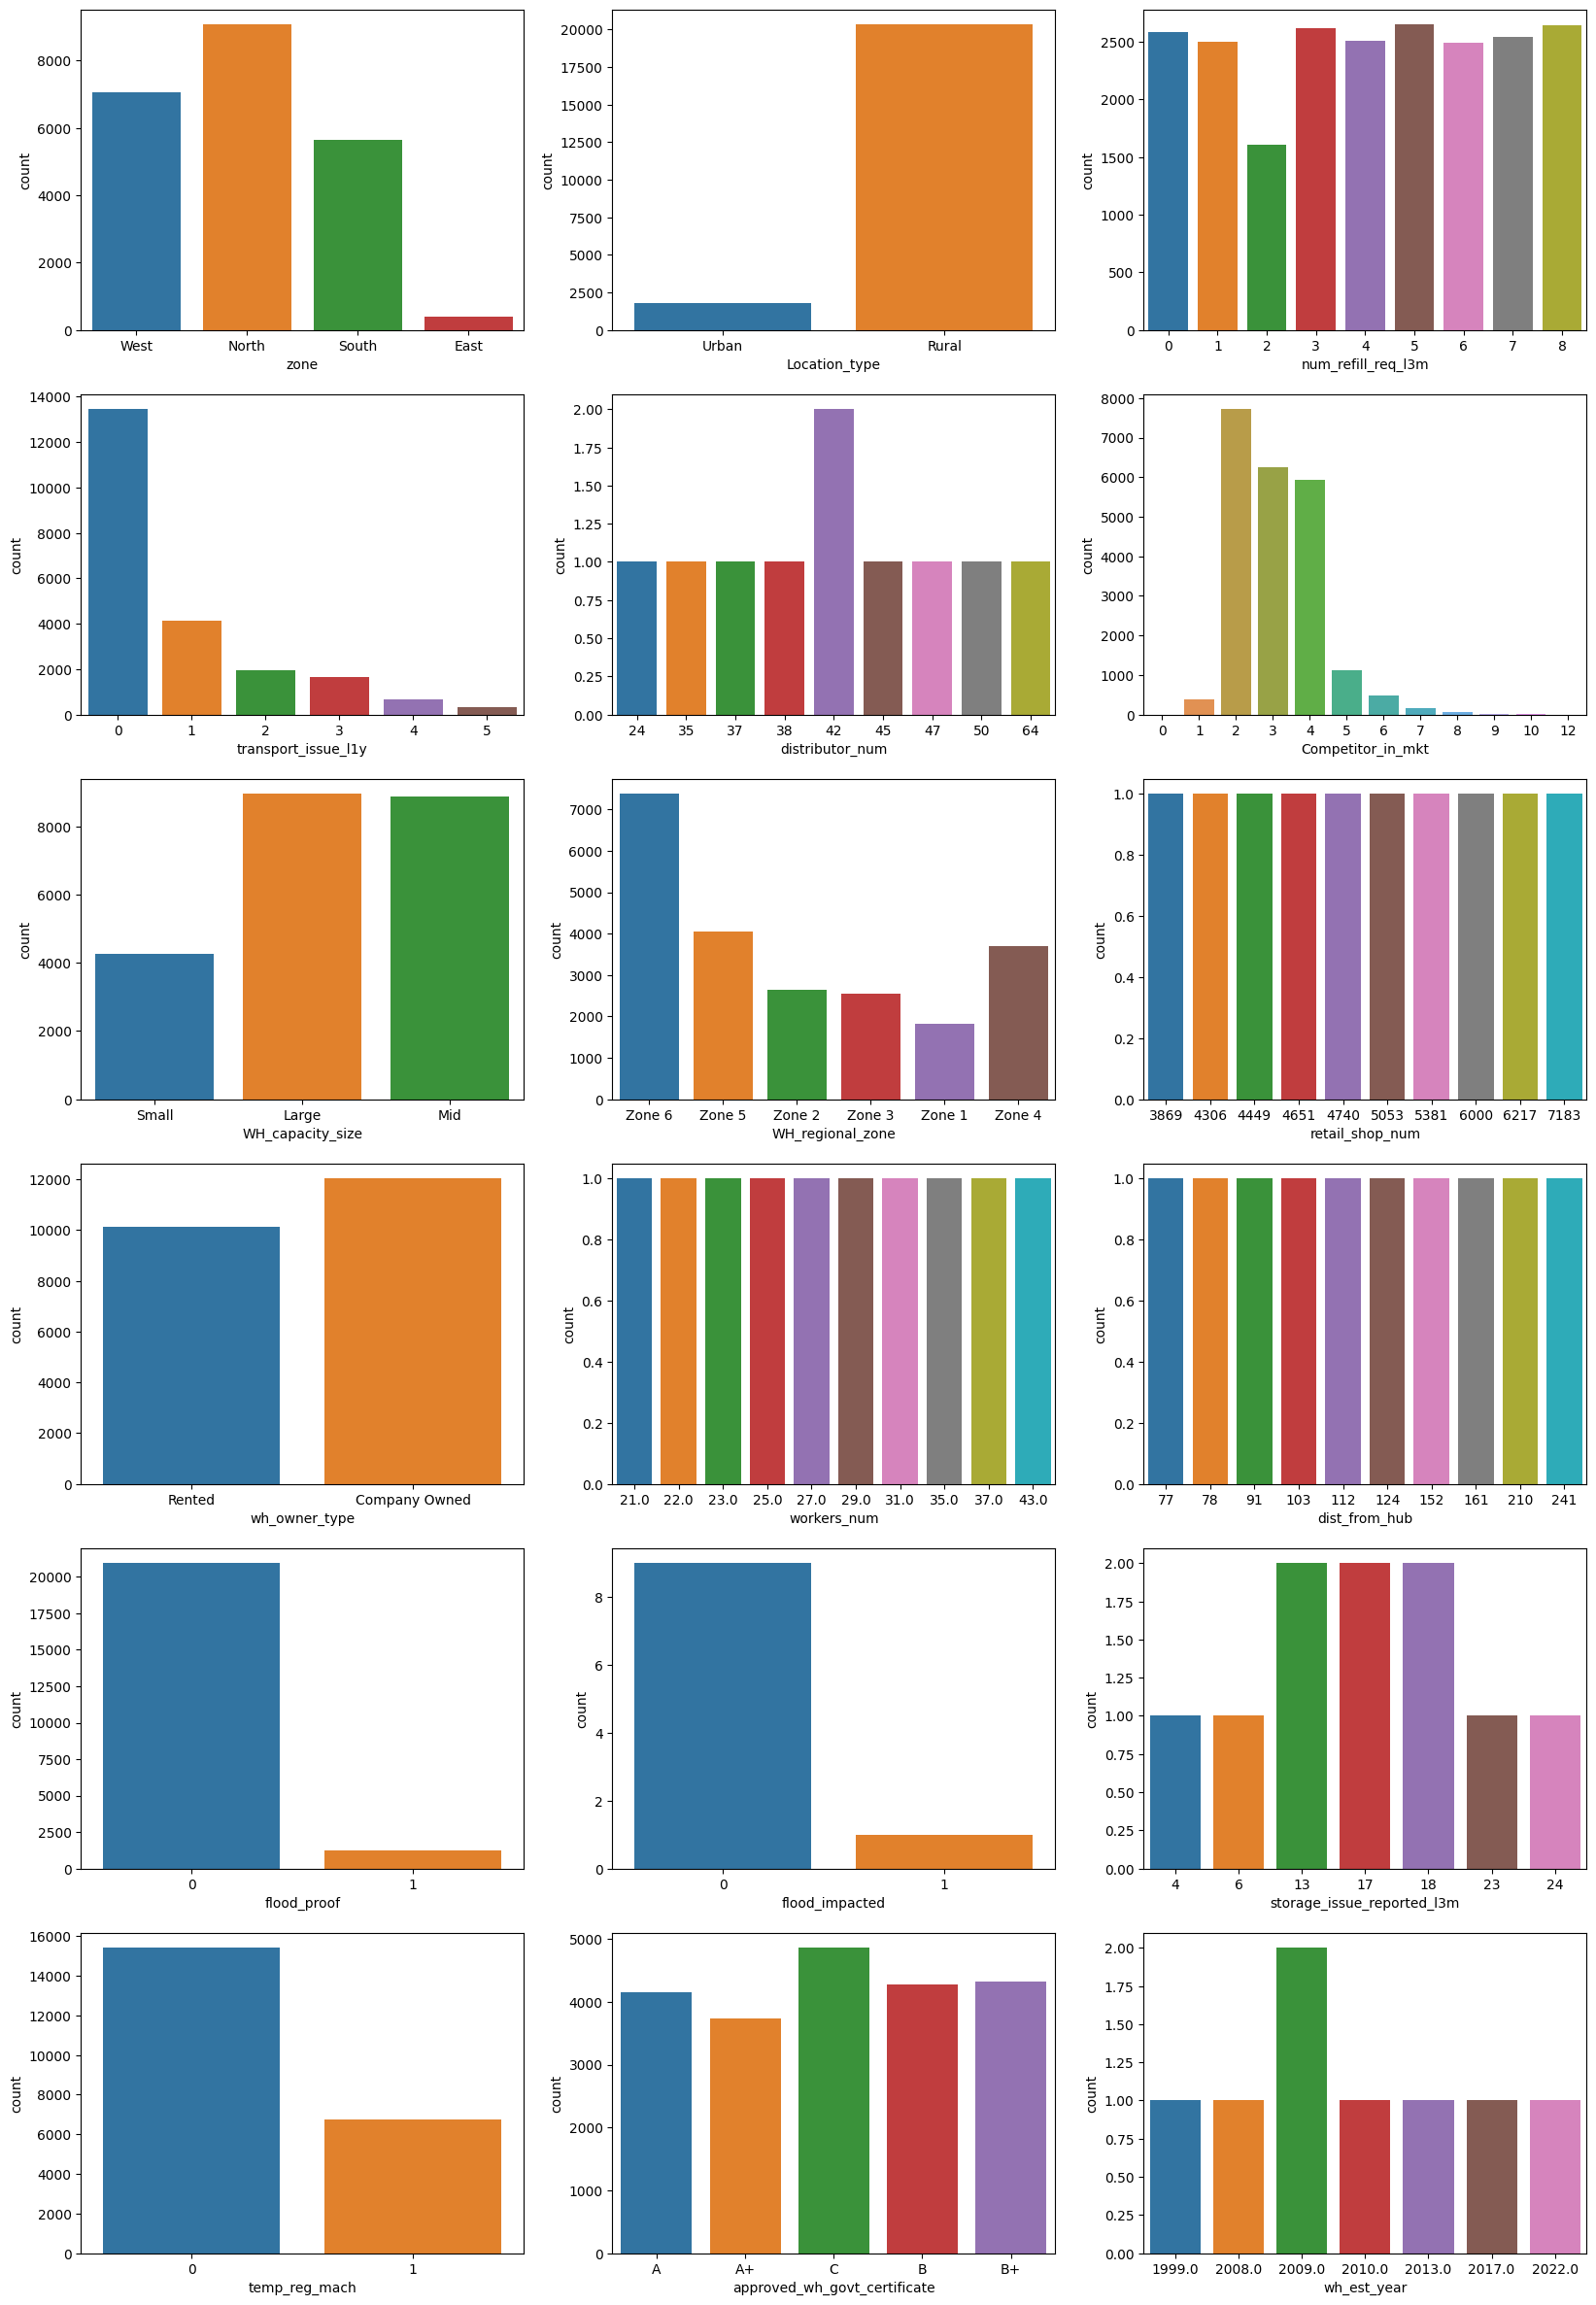

In [21]:
fig,axes = plt.subplots(6,3,figsize = (20,30))
sns.countplot(ax = axes[0][0],x = df['zone'])
sns.countplot(ax = axes[0][1],x = df['Location_type'])
sns.countplot(ax = axes[0][2],x = df['num_refill_req_l3m'])
sns.countplot(ax = axes[1][0],x = df['transport_issue_l1y'])
sns.countplot(ax = axes[1][1],x = df['distributor_num'][:10])
sns.countplot(ax = axes[1][2],x = df['Competitor_in_mkt'])
sns.countplot(ax = axes[2][0],x = df['WH_capacity_size'])
sns.countplot(ax = axes[2][1],x = df['WH_regional_zone'])
sns.countplot(ax = axes[2][2],x = df['retail_shop_num'][:10])
sns.countplot(ax = axes[3][0],x = df['wh_owner_type'])
sns.countplot(ax = axes[3][1],x = df['workers_num'][:10])
sns.countplot(ax = axes[3][2],x = df['dist_from_hub'][:10])
sns.countplot(ax = axes[4][0],x = df['flood_proof'])
sns.countplot(ax = axes[4][1],x = df['flood_impacted'][:10])
sns.countplot(ax = axes[4][2],x = df['storage_issue_reported_l3m'][:10])
sns.countplot(ax = axes[5][0],x = df['temp_reg_mach'])
sns.countplot(ax = axes[5][1],x = df['approved_wh_govt_certificate'])
sns.countplot(ax = axes[5][2],x = df['wh_est_year'][:15])
plt.show()

### Step 5 : Feature Engineering

In [22]:
print('Mean value of Workers Number is :',df['workers_num'].mean())
print('Median value of Workers Number is :',df['workers_num'].median())

Mean value of Workers Number is : 28.93639825130447
Median value of Workers Number is : 28.0


In [23]:
df['workers_num'] = df['workers_num'].fillna(28)

In [24]:
print('Mode of Approved Warehouse govt Certificate is :',df['approved_wh_govt_certificate'].mode()[0])

Mode of Approved Warehouse govt Certificate is : C


In [25]:
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna('C')

In [26]:
print('Mean value of Warehouse Establishment Year is :',df['wh_est_year'].mean())
print('Median value of Warehouse Establishment Year is :',df['wh_est_year'].median())

Mean value of Warehouse Establishment Year is : 2009.4012063765617
Median value of Warehouse Establishment Year is : 2009.0


In [27]:
df['wh_est_year'] = df['wh_est_year'].fillna(2009)

In [28]:
# Data Checking After Imputing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [29]:
# Checking Categorical Information
cat_feature = df[['Location_type','WH_capacity_size','zone','WH_regional_zone',
                               'wh_owner_type','approved_wh_govt_certificate']]
for i in cat_feature:
  print('*'*20)
  print(i)
  print(cat_feature[i].value_counts())
  print('*'*20)

********************
Location_type
Rural    20334
Urban     1816
Name: Location_type, dtype: int64
********************
********************
WH_capacity_size
Large    8968
Mid      8902
Small    4280
Name: WH_capacity_size, dtype: int64
********************
********************
zone
North    9069
West     7055
South    5644
East      382
Name: zone, dtype: int64
********************
********************
WH_regional_zone
Zone 6    7376
Zone 5    4045
Zone 4    3708
Zone 2    2642
Zone 3    2552
Zone 1    1827
Name: WH_regional_zone, dtype: int64
********************
********************
wh_owner_type
Company Owned    12035
Rented           10115
Name: wh_owner_type, dtype: int64
********************
********************
approved_wh_govt_certificate
C     5664
B+    4321
B     4269
A     4158
A+    3738
Name: approved_wh_govt_certificate, dtype: int64
********************


In [30]:
df['Location_type'] = df['Location_type'].map({'Rural':1,'Urban':0})
df['wh_owner_type'] = df['wh_owner_type'].map({'Company Owned':1,'Rented':0}) 

In [31]:
# Using Label Enconder technique
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['WH_capacity_size']= label_encoder.fit_transform(df['WH_capacity_size'])
df['zone']= label_encoder.fit_transform(df['zone'])
df['WH_regional_zone']= label_encoder.fit_transform(df['WH_regional_zone'])
df['approved_wh_govt_certificate']= label_encoder.fit_transform(df['approved_wh_govt_certificate'])

In [32]:
# Checking random 10 sample 
df.sample(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
6676,WH_106676,EID_56676,1,1,0,2,7,0,6,4300,...,1,153,26.0,1998.0,30,0,4,3,27,40120
18830,WH_118830,EID_68830,1,1,0,3,2,2,4,5935,...,0,171,19.0,2009.0,11,1,2,6,26,13108
6396,WH_106396,EID_56396,1,1,3,2,1,3,4,5274,...,1,182,40.0,2009.0,4,0,4,1,19,6124
22137,WH_122137,EID_72137,1,0,1,4,0,1,2,4542,...,1,247,23.0,2009.0,27,0,3,5,25,32093
12765,WH_112765,EID_62765,1,1,3,2,4,2,2,4943,...,1,170,22.0,2009.0,9,0,2,1,19,10073
21074,WH_121074,EID_71074,1,0,1,5,7,0,4,4426,...,0,57,23.0,2005.0,26,0,0,4,23,36078
18233,WH_118233,EID_68233,1,2,1,0,2,0,3,5269,...,1,201,29.0,2009.0,9,0,4,5,31,12139
18207,WH_118207,EID_68207,1,0,3,5,2,0,4,5147,...,1,83,30.0,2009.0,0,0,4,0,23,3078
6374,WH_106374,EID_56374,1,0,1,4,8,2,2,4150,...,0,152,39.0,2009.0,15,0,3,6,24,17073
722,WH_100722,EID_50722,1,1,0,3,3,2,5,3903,...,1,106,22.0,2009.0,25,0,4,6,26,31149


In [33]:
df = df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1)

### Box Plot visualization

In [34]:
features = df.columns
features = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton']

In [35]:
list(enumerate(features))

[(0, 'Location_type'),
 (1, 'WH_capacity_size'),
 (2, 'zone'),
 (3, 'WH_regional_zone'),
 (4, 'num_refill_req_l3m'),
 (5, 'transport_issue_l1y'),
 (6, 'Competitor_in_mkt'),
 (7, 'retail_shop_num'),
 (8, 'wh_owner_type'),
 (9, 'distributor_num'),
 (10, 'flood_impacted'),
 (11, 'flood_proof'),
 (12, 'electric_supply'),
 (13, 'dist_from_hub'),
 (14, 'workers_num'),
 (15, 'wh_est_year'),
 (16, 'storage_issue_reported_l3m'),
 (17, 'temp_reg_mach'),
 (18, 'approved_wh_govt_certificate'),
 (19, 'wh_breakdown_l3m'),
 (20, 'govt_check_l3m'),
 (21, 'product_wg_ton')]

### Box Plot Visualization Before Outlier Treatment

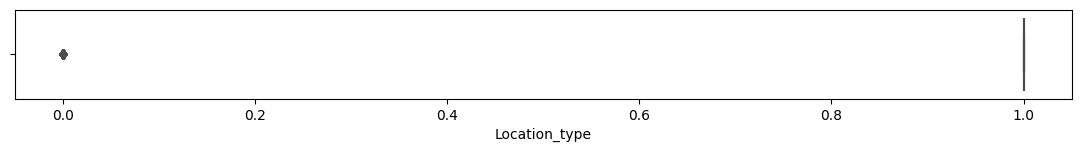

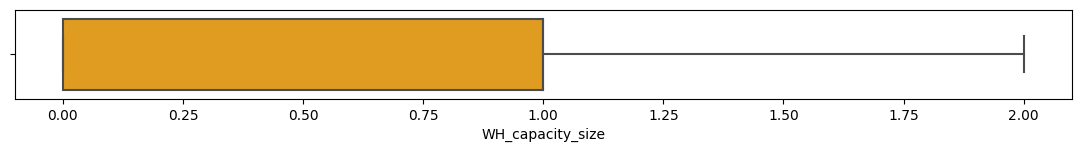

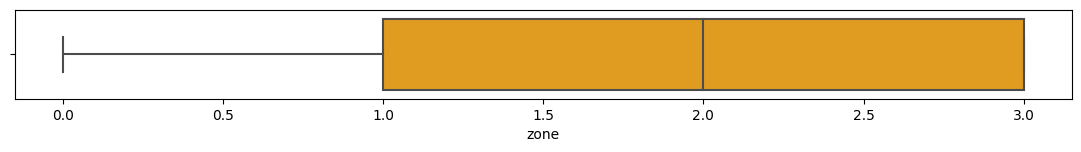

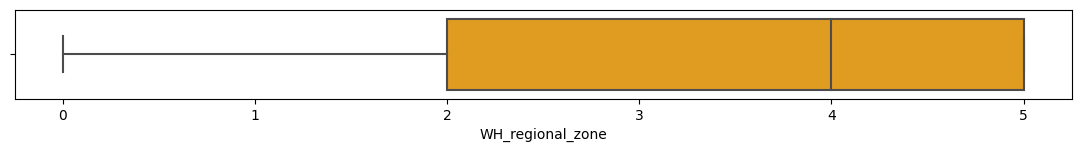

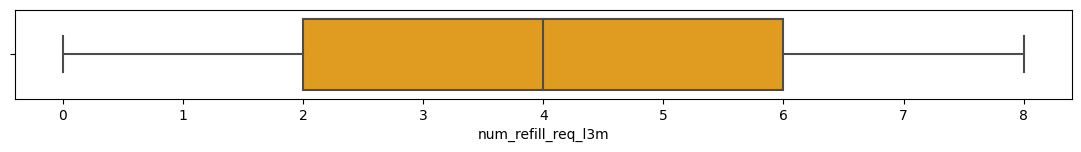

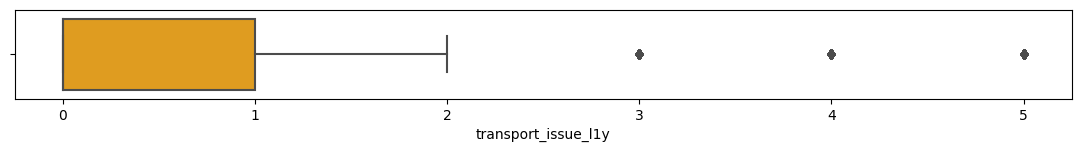

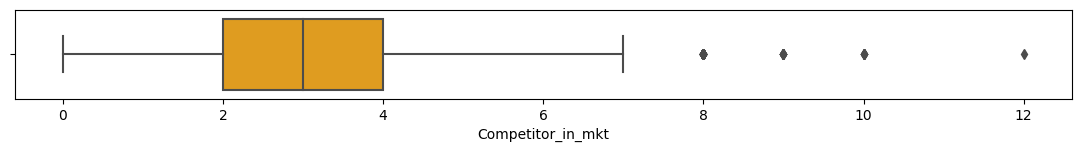

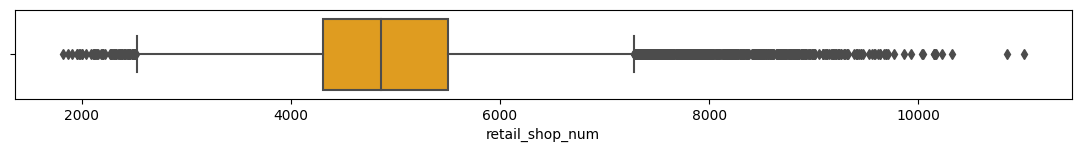

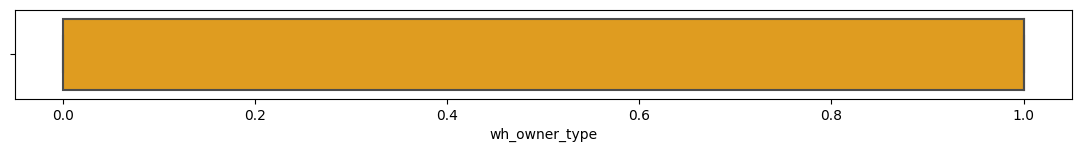

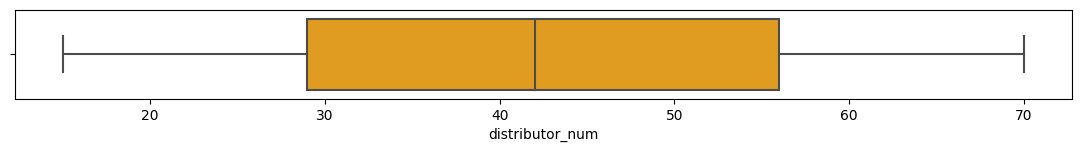

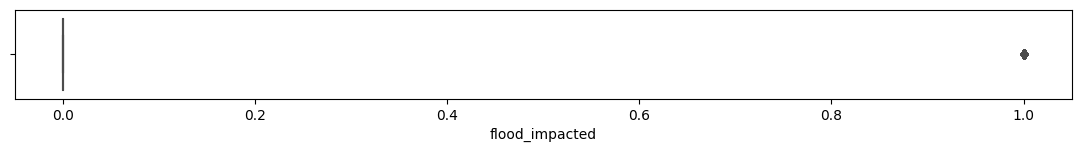

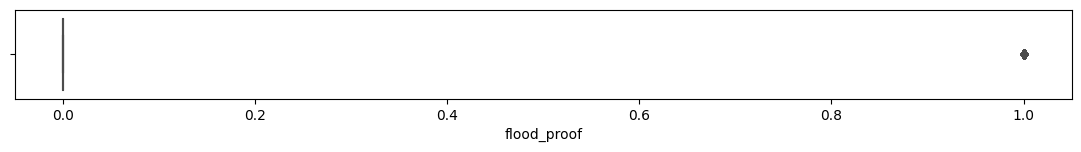

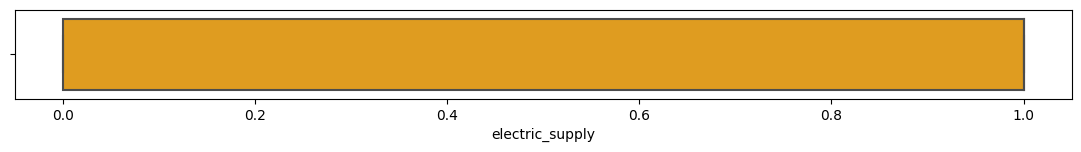

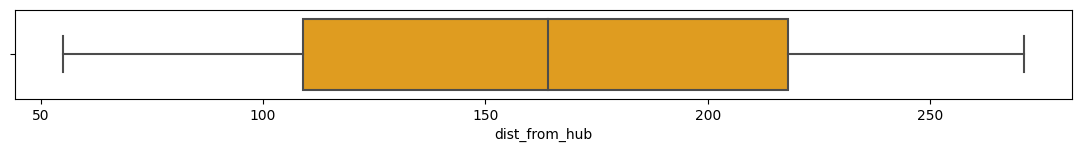

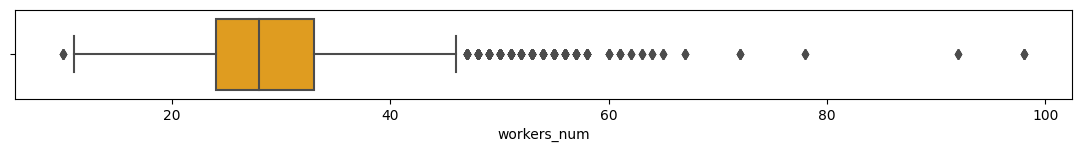

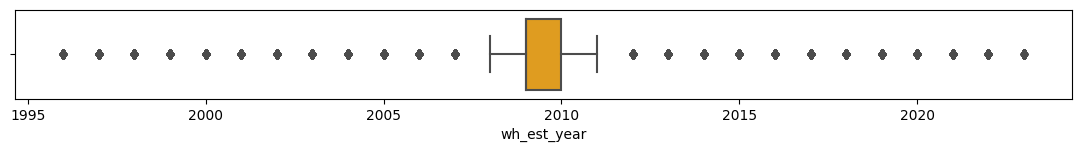

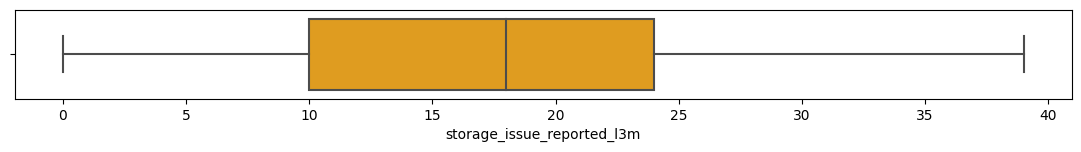

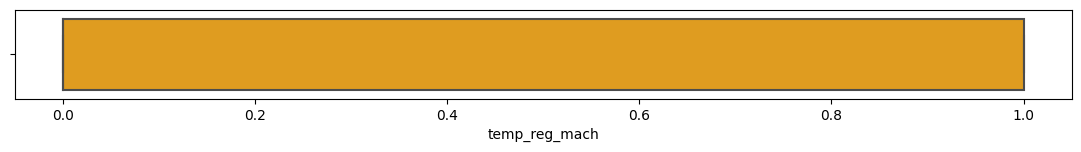

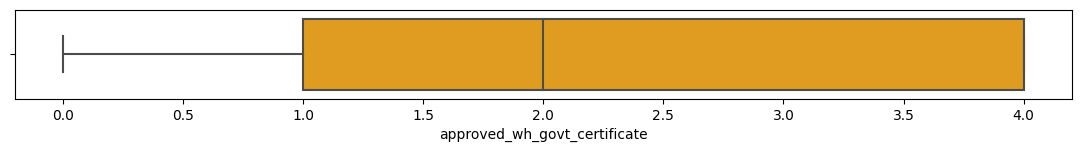

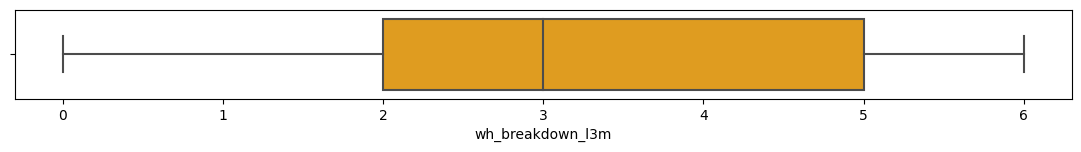

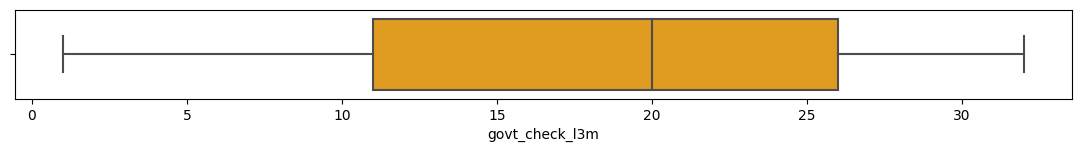

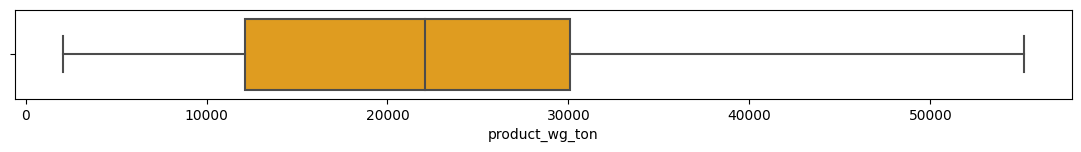

In [36]:
# Checking Outlier In The Datset
for col in enumerate(features):
    plt.figure(figsize=(30,15))
    plt.subplot(11,2,col[0]+1)
    sns.boxplot(x = col[1],color='orange',data=df)
    plt.show()

### Outlier Removal Technique

In [37]:
def outlier(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    ls = df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [38]:
index_list = []
for feature in ['workers_num','retail_shop_num','wh_est_year']:
    index_list.extend(outlier(df,feature))

In [39]:
def remove(df,ls):
    ls = sorted(set(ls))
    df=df.drop(ls)
    return df

In [40]:
df_new = remove(df,index_list)

### Box Plot Visualization After Outlier Treatment

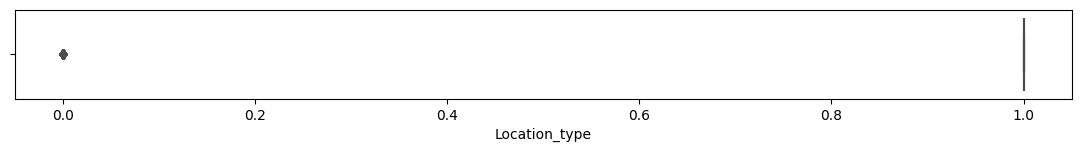

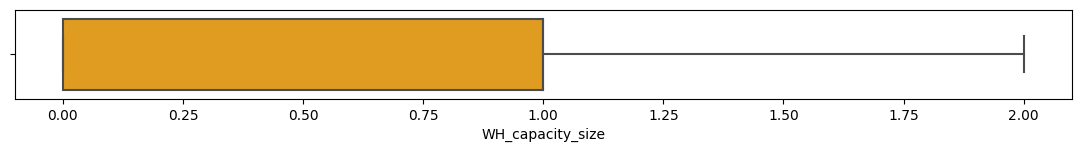

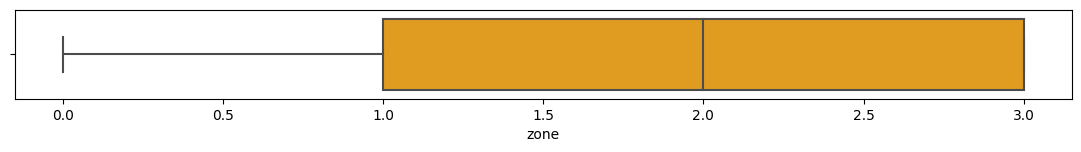

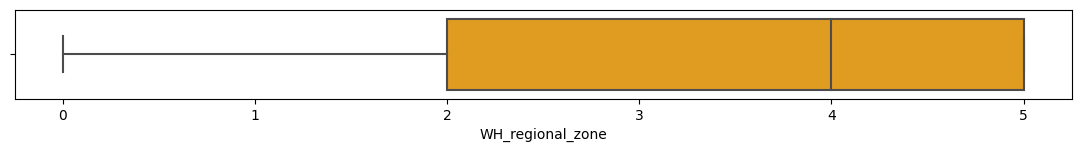

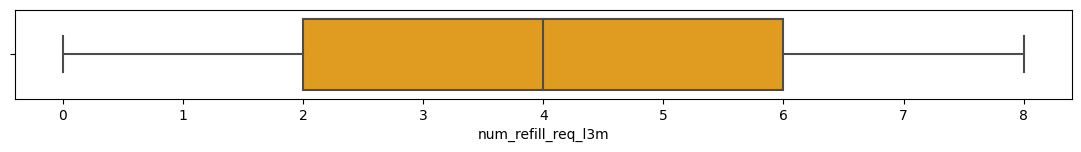

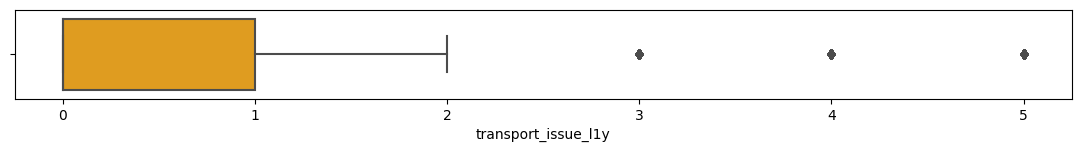

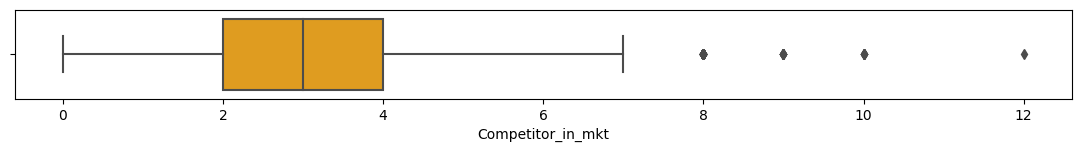

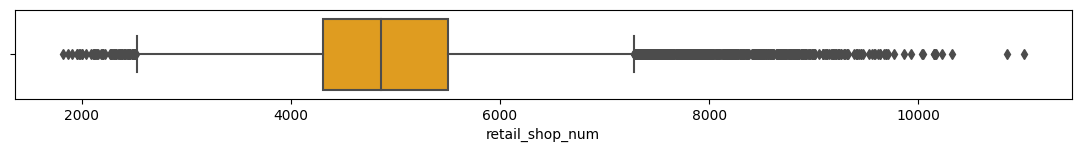

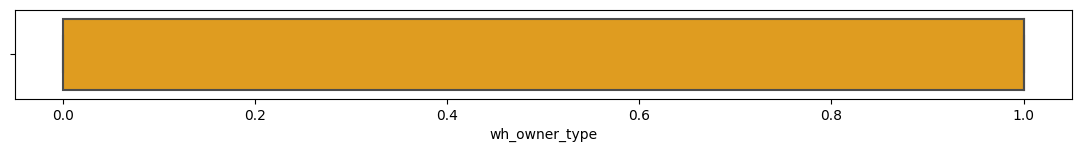

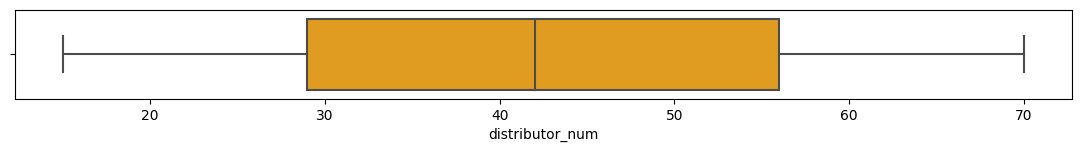

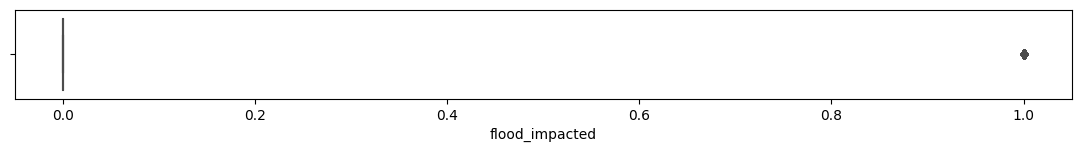

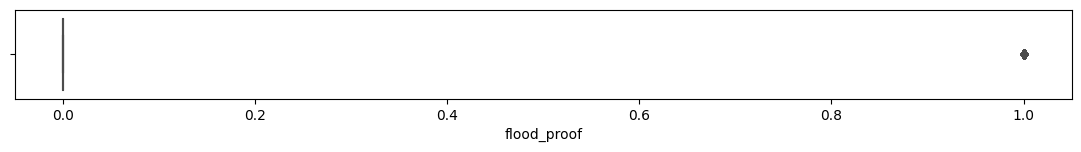

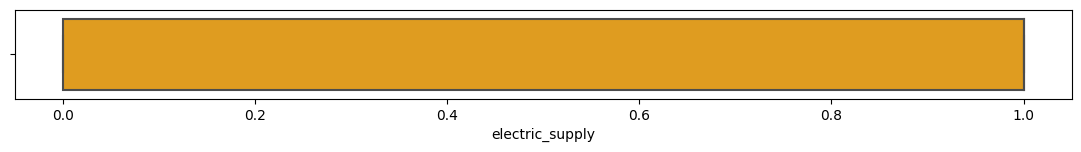

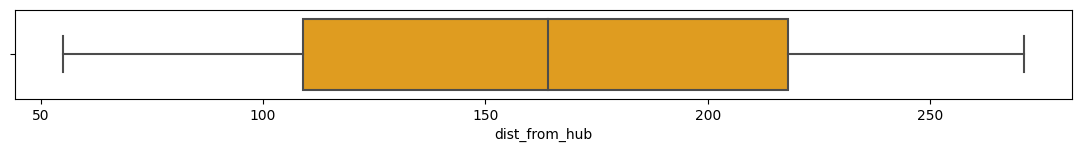

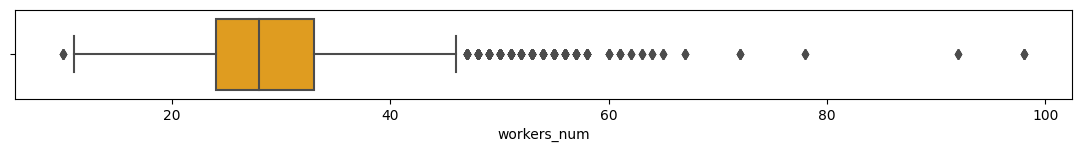

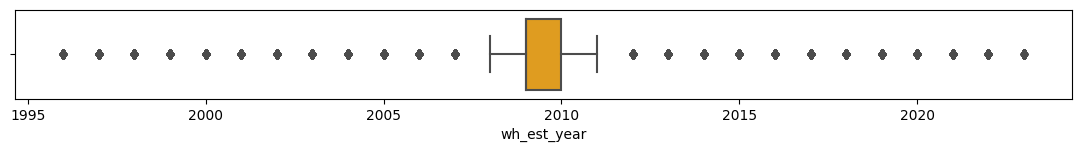

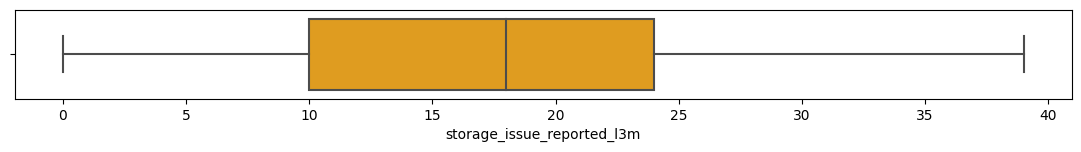

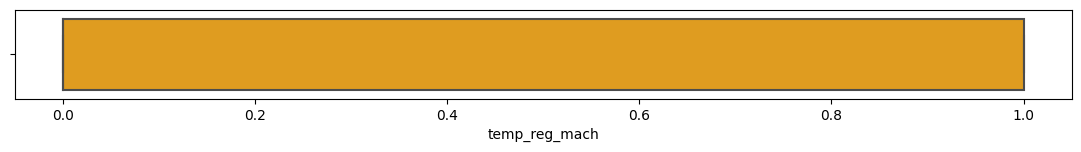

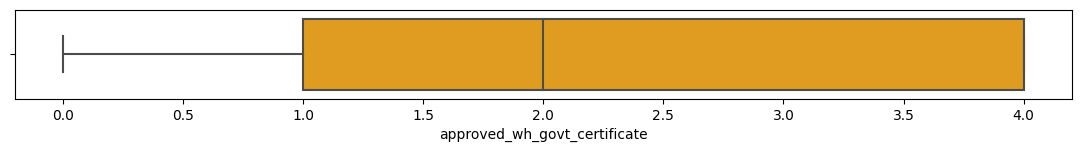

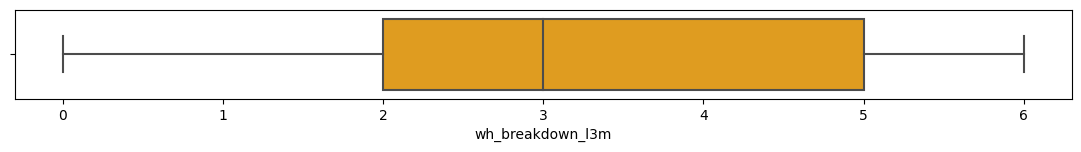

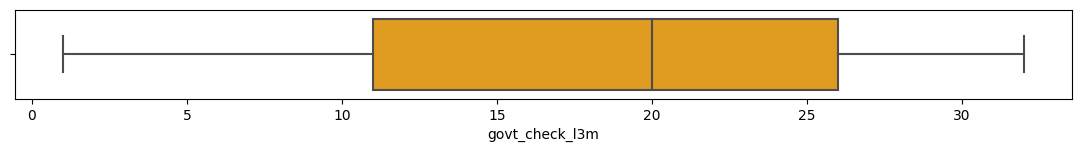

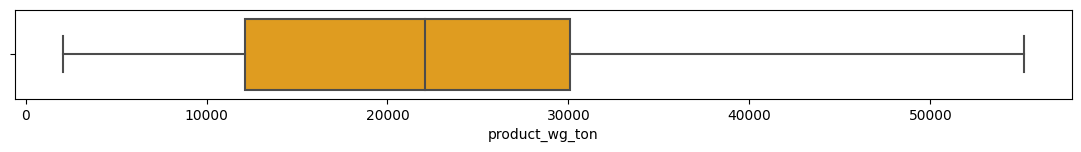

In [41]:
# Checking Outlier In The Datset
for col in enumerate(features):
    plt.figure(figsize=(30,15))
    plt.subplot(11,2,col[0]+1)
    sns.boxplot(x = col[1],color='orange',data=df)
    plt.show()

### Step 6 : Feature Selection Techniques

####  1. Feature Selection Using Pearsons Correleation Method

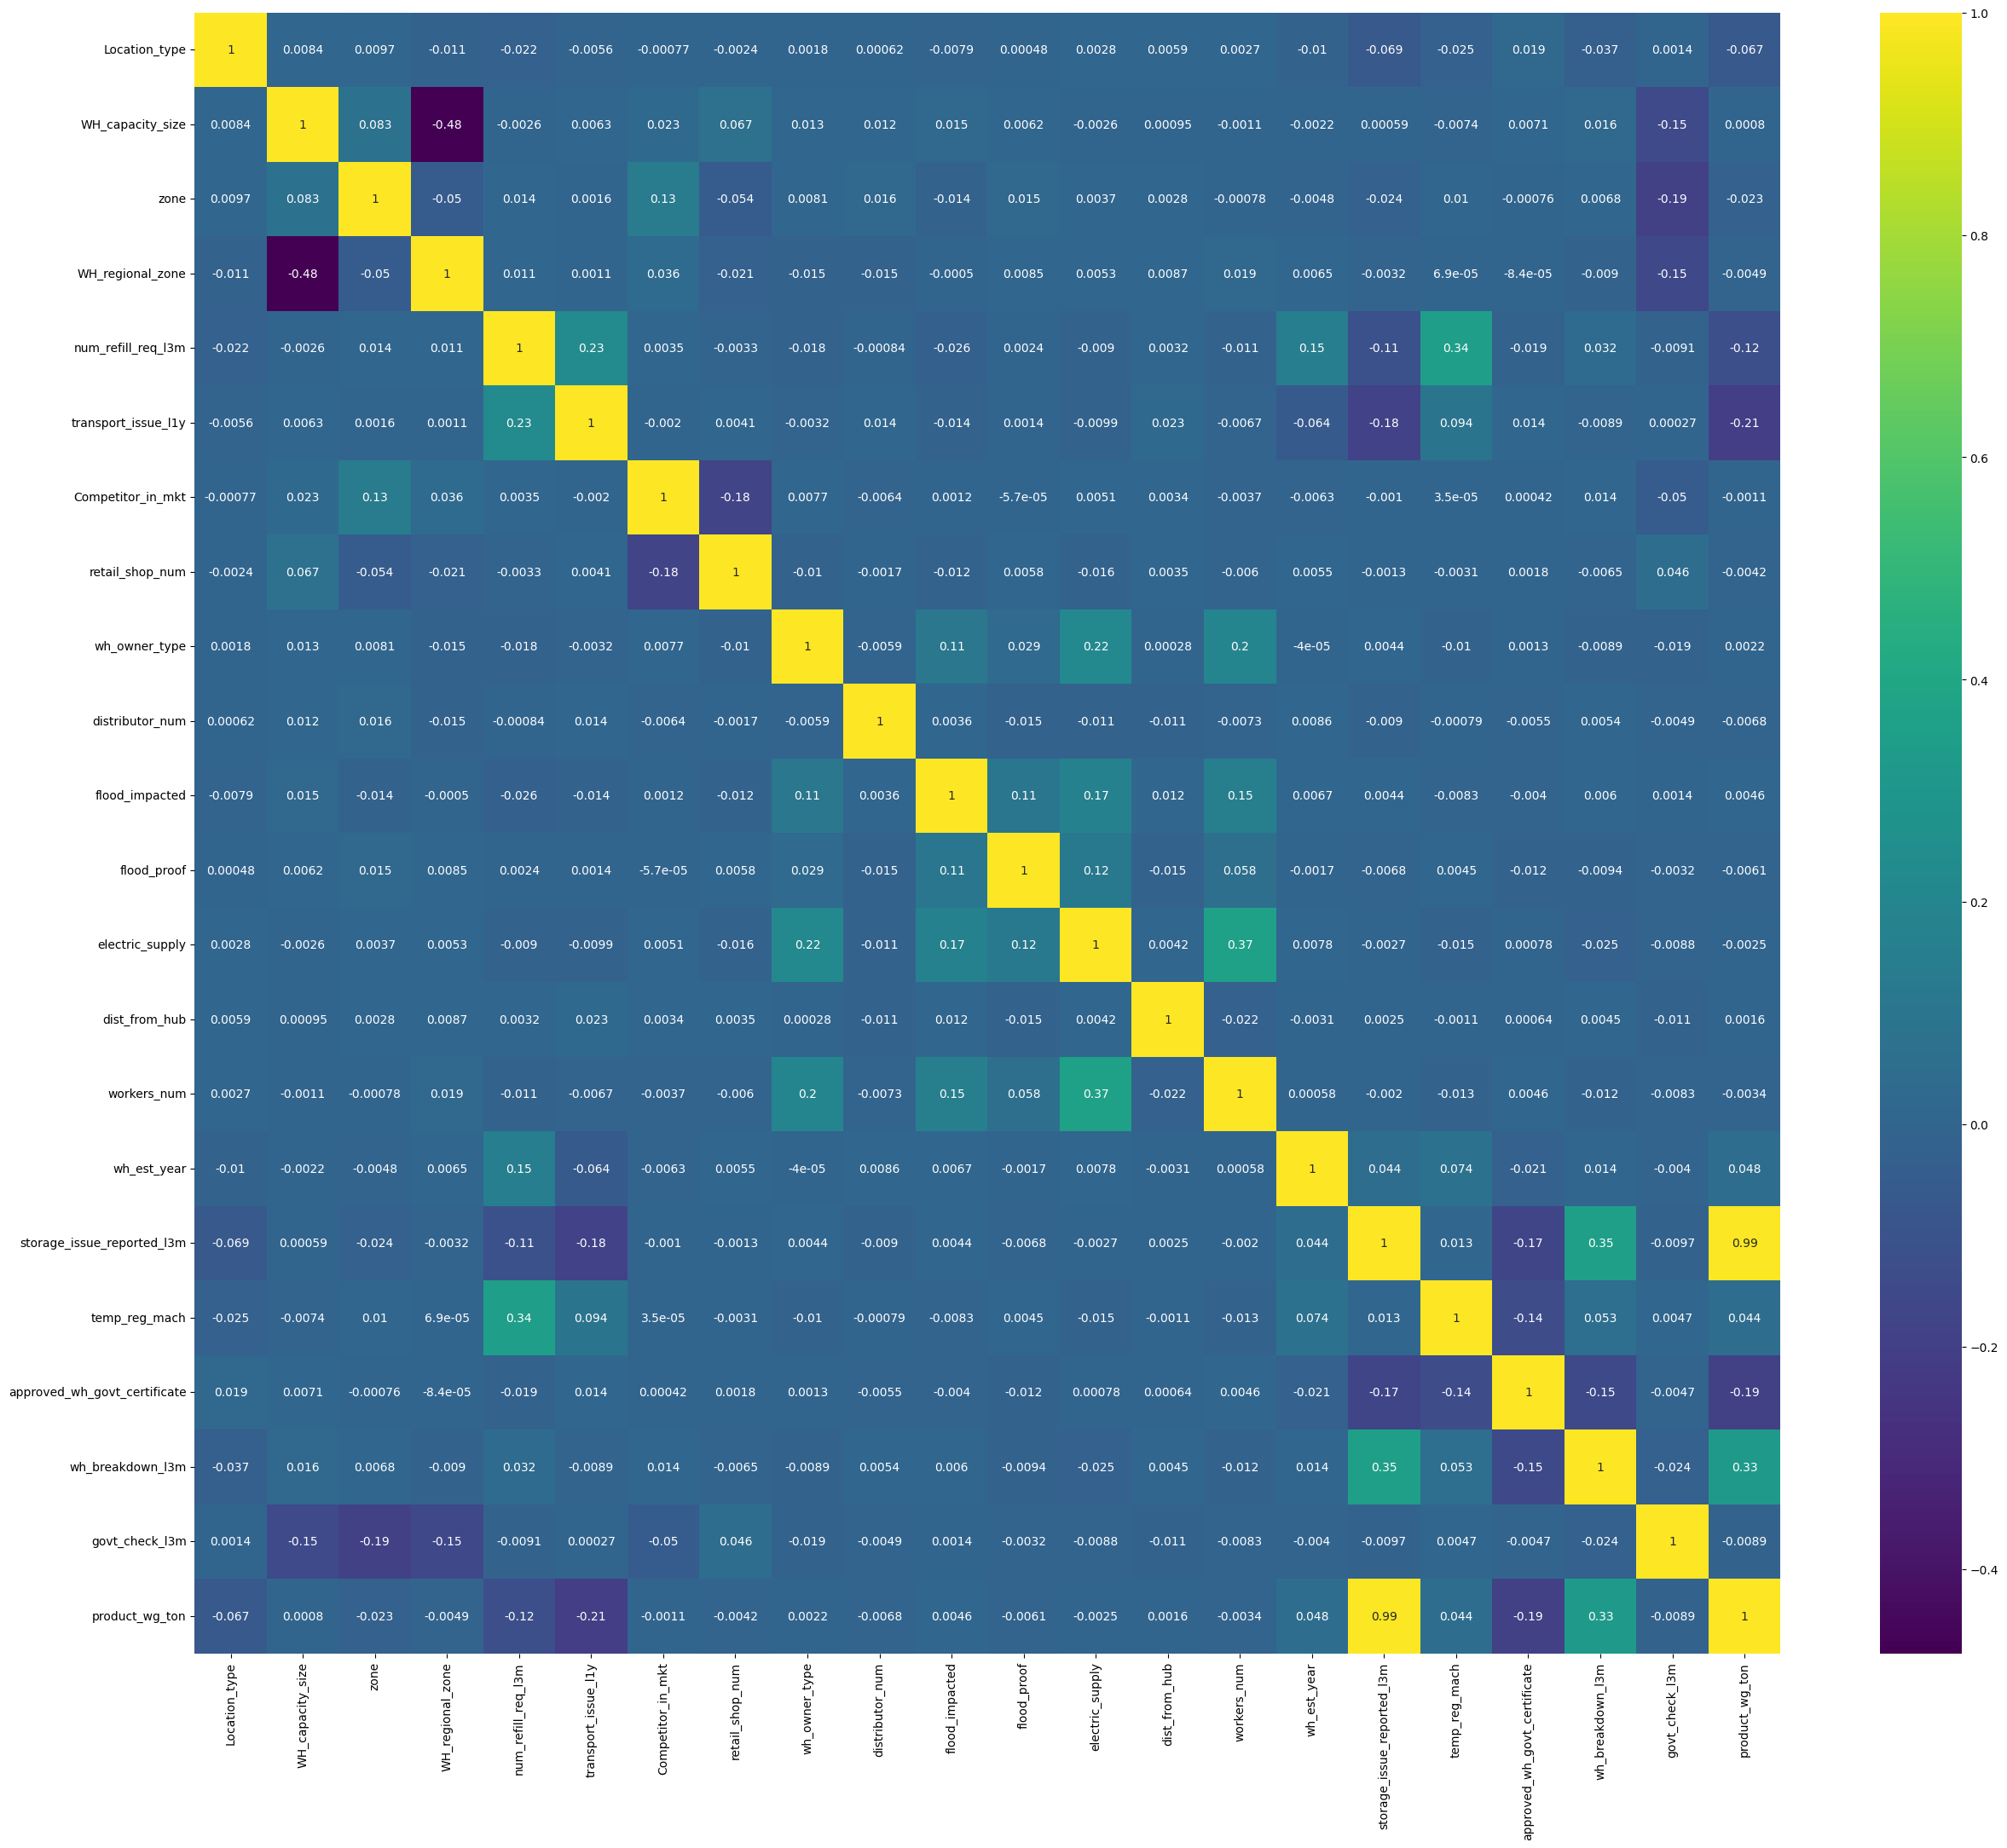

In [42]:
plt.figure(figsize = (30,25))
sns.heatmap(df_new.corr(),annot=True,cmap = 'viridis');

### Splitting Dataset Into Train and Test Split

In [43]:
X = df_new.drop('product_wg_ton',axis=1).assign(const=1)
y = df_new['product_wg_ton']

####  2. Feature Selection Using Variance Inflation Factor [VIF] Method

In [44]:
#checking multicollinearity.
#This will display the VIF values for each independent variable. Variables with high VIF values may indicate multicollinearity issues.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_new.drop('product_wg_ton',axis = 1)  # Add all your independent variables
X = sm.add_constant(X)
model = sm.OLS(df_new['product_wg_ton'],X)
results = model.fit()
vif = pd.DataFrame()
vif["FEATURES COLUMN"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('*'*60)
print(vif)
print('*'*60)

************************************************************
                 FEATURES COLUMN    VIF Factor
0                          const  2.056878e+07
1                  Location_type  1.006592e+00
2               WH_capacity_size  1.394182e+00
3                           zone  1.064343e+00
4               WH_regional_zone  1.396318e+00
5             num_refill_req_l3m  1.229605e+00
6            transport_issue_l1y  1.096058e+00
7              Competitor_in_mkt  1.053529e+00
8                retail_shop_num  1.042747e+00
9                  wh_owner_type  1.073266e+00
10               distributor_num  1.001572e+00
11                flood_impacted  1.053774e+00
12                   flood_proof  1.024298e+00
13               electric_supply  1.215208e+00
14                 dist_from_hub  1.002097e+00
15                   workers_num  1.186363e+00
16                   wh_est_year  1.036901e+00
17    storage_issue_reported_l3m  1.222669e+00
18                 temp_reg_mach  1.159768e+00

### Splitting Dataset into Train and Test

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [46]:
X_train.drop(['const'],axis=1,inplace=True)

In [47]:
X_test.drop(['const'],axis=1,inplace=True)

####  3. Feature Selection Using Variance Threshold Method

In [48]:
from sklearn.feature_selection import VarianceThreshold
var_th = VarianceThreshold(threshold=0)
var_th.fit(X_train)
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [49]:
# Qualifying Features from Variance Threshold Methods
sum(var_th.get_support())

21

In [50]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [51]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

0

In [52]:
corr_features

set()

####  4. Feature Selection Using Mutual Information Regressor Method

In [53]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.        , 0.        , 0.01090118, 0.        , 0.07002788,
       0.03336185, 0.00368043, 0.        , 0.00404497, 0.        ,
       0.00416747, 0.00317093, 0.        , 0.        , 0.        ,
       0.090927  , 2.12235344, 0.02179836, 0.08499983, 0.17777328,
       0.        ])

In [54]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

storage_issue_reported_l3m      2.122353
wh_breakdown_l3m                0.177773
wh_est_year                     0.090927
approved_wh_govt_certificate    0.085000
num_refill_req_l3m              0.070028
transport_issue_l1y             0.033362
temp_reg_mach                   0.021798
zone                            0.010901
flood_impacted                  0.004167
wh_owner_type                   0.004045
Competitor_in_mkt               0.003680
flood_proof                     0.003171
workers_num                     0.000000
Location_type                   0.000000
dist_from_hub                   0.000000
electric_supply                 0.000000
WH_capacity_size                0.000000
distributor_num                 0.000000
retail_shop_num                 0.000000
WH_regional_zone                0.000000
govt_check_l3m                  0.000000
dtype: float64

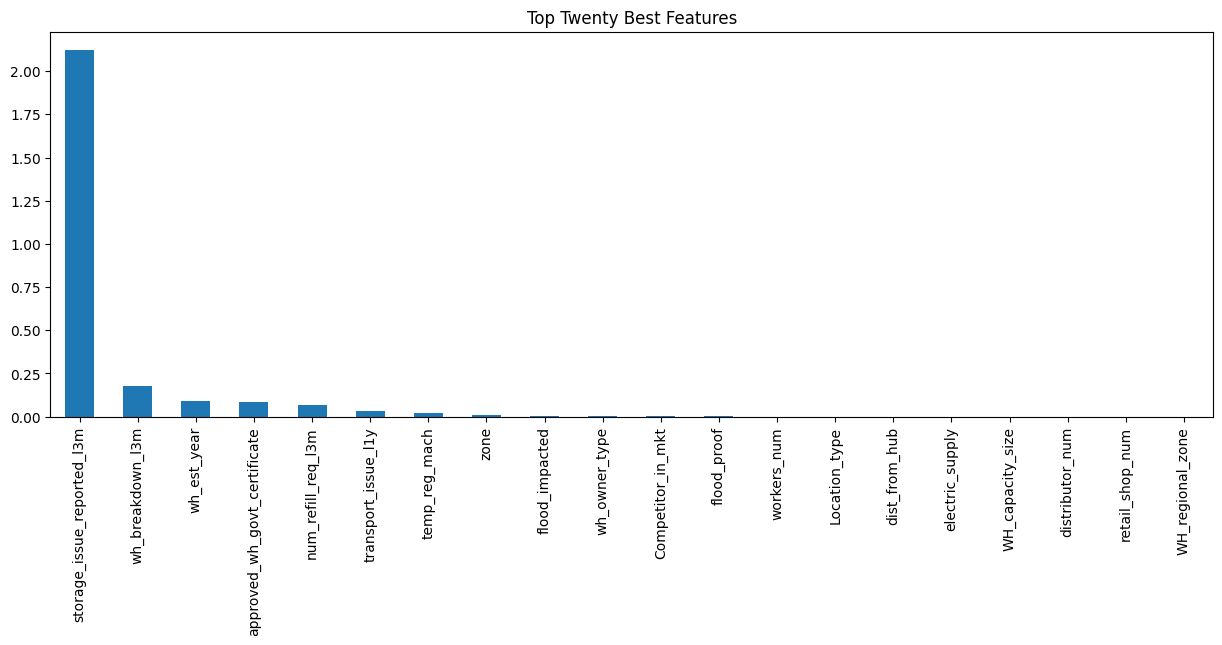

In [55]:
mutual_info.sort_values(ascending=False)[:20].plot.bar(figsize=(15,5))
plt.title('Top Twenty Best Features')
plt.show()

In [56]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x00000210E3D9DCF0>)

In [57]:
selected_top_columns.get_support()

array([ True, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False])

In [58]:
X_train.columns[selected_top_columns.get_support()]

Index(['Location_type', 'zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'wh_est_year', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m'],
      dtype='object')

####  5. Feature Selection Using OLS Regression Method

In [59]:
import statsmodels.api as sm
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.996e+04
Date:                Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:48:42   Log-Likelihood:            -1.0009e+05
No. Observations:               11550   AIC:                         2.002e+05
Df Residuals:                   11528   BIC:                         2.004e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.012e+05   5.93e+04     -1.707      0.088   -2.17e+05     1.5e+04
Location_type                   68.4262     47.727      1.434      0.152     -25.127     161.980
WH_capacity_size                 7.0412     20.676      0.341      0.733     -33.488      47.570
zone                            -2.7185     15.285     -0.178      0.859     -32.681      27.244
WH_regional_zone               -10.2562      9.249     -1.109      0.267     -28.386       7.873
num_refill_req_l3m             -70.2599      5.451    -12.890      0.000     -80.945     -59.575
transport_issue_l1y           -196.3817     10.199    -19.255      0.000    -216.374    -176.390
Competitor_in_mkt               -1.7795     11.889     -0.150      0.881     -25.084      21.525
retail_shop_num                 -0.0359      0.015     -2.369      0.018      -0.066      -0.006
wh_owner_type                  -48.1206     27.176     -1.771      0.077    -101.390       5.149
distributor_num                  1.5472      0.816      1.895      0.058      -0.053       3.147
flood_impacted                   3.2669     44.826      0.073      0.942     -84.600      91.134
flood_proof                      4.9404     56.468      0.087      0.930    -105.747     115.628
electric_supply                 15.7790     30.398      0.519      0.604     -43.806      75.364
dist_from_hub                   -0.0003      0.209     -0.001      0.999      -0.409       0.409
workers_num                     -2.0871      2.149     -0.971      0.331      -6.299       2.125
wh_est_year                     51.1775     29.505      1.735      0.083      -6.658     109.013
storage_issue_reported_l3m    1247.1323      1.745    714.795      0.000    1243.712    1250.552
temp_reg_mach                  966.9588     33.592     28.786      0.000     901.114    1032.804
approved_wh_govt_certificate  -133.7796      9.265    -14.440      0.000    -151.940    -115.619
wh_breakdown_l3m              -149.3194      8.428    -17.718      0.000    -165.839    -132.800
govt_check_l3m                  -0.5804      1.615     -0.359      0.719      -3.745       2.585
==============================================================================
Omnibus:                      466.806   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.472
Skew:                           0.470   Prob(JB):                    4.83e-120
Kurtosis:                       3.507   Cond. No.                     2.43e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+07. This might indicate that there are
stro

In [60]:
df_new.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

### Conclusion :

1. Based On various Feature Selection Techniques Following Features are Selected for Machine Learning Model...

'Location_type', 'zone', 'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt','wh_owner_type','flood_impacted','electric_supply',
'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
'approved_wh_govt_certificate', 'wh_breakdown_l3m'

2. As Selected Features are 13 so in order to reduce dimensionality and Complexity of the Model PCA i.e. Principal Component Analysis Technique Suggested.


In [61]:
features = df[['Location_type', 'zone', 'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt','wh_owner_type','flood_impacted','electric_supply',
'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
'approved_wh_govt_certificate', 'wh_breakdown_l3m','product_wg_ton']]

In [62]:
data = pd.DataFrame(features)
data.shape

(22150, 14)

In [63]:
data.head(5)

,Location_type,zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,wh_owner_type,flood_impacted,electric_supply,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,product_wg_ton
0,0,3,3,1,2,0,0,1,2009.0,13,0,0,5,17115
1,1,1,0,0,4,1,0,1,2009.0,4,0,0,3,5074
2,1,2,1,0,4,1,0,0,2009.0,17,0,0,6,23137
3,1,1,7,4,2,0,0,0,2009.0,17,1,1,3,22115
4,1,1,3,1,2,1,1,1,2009.0,18,0,4,6,24071


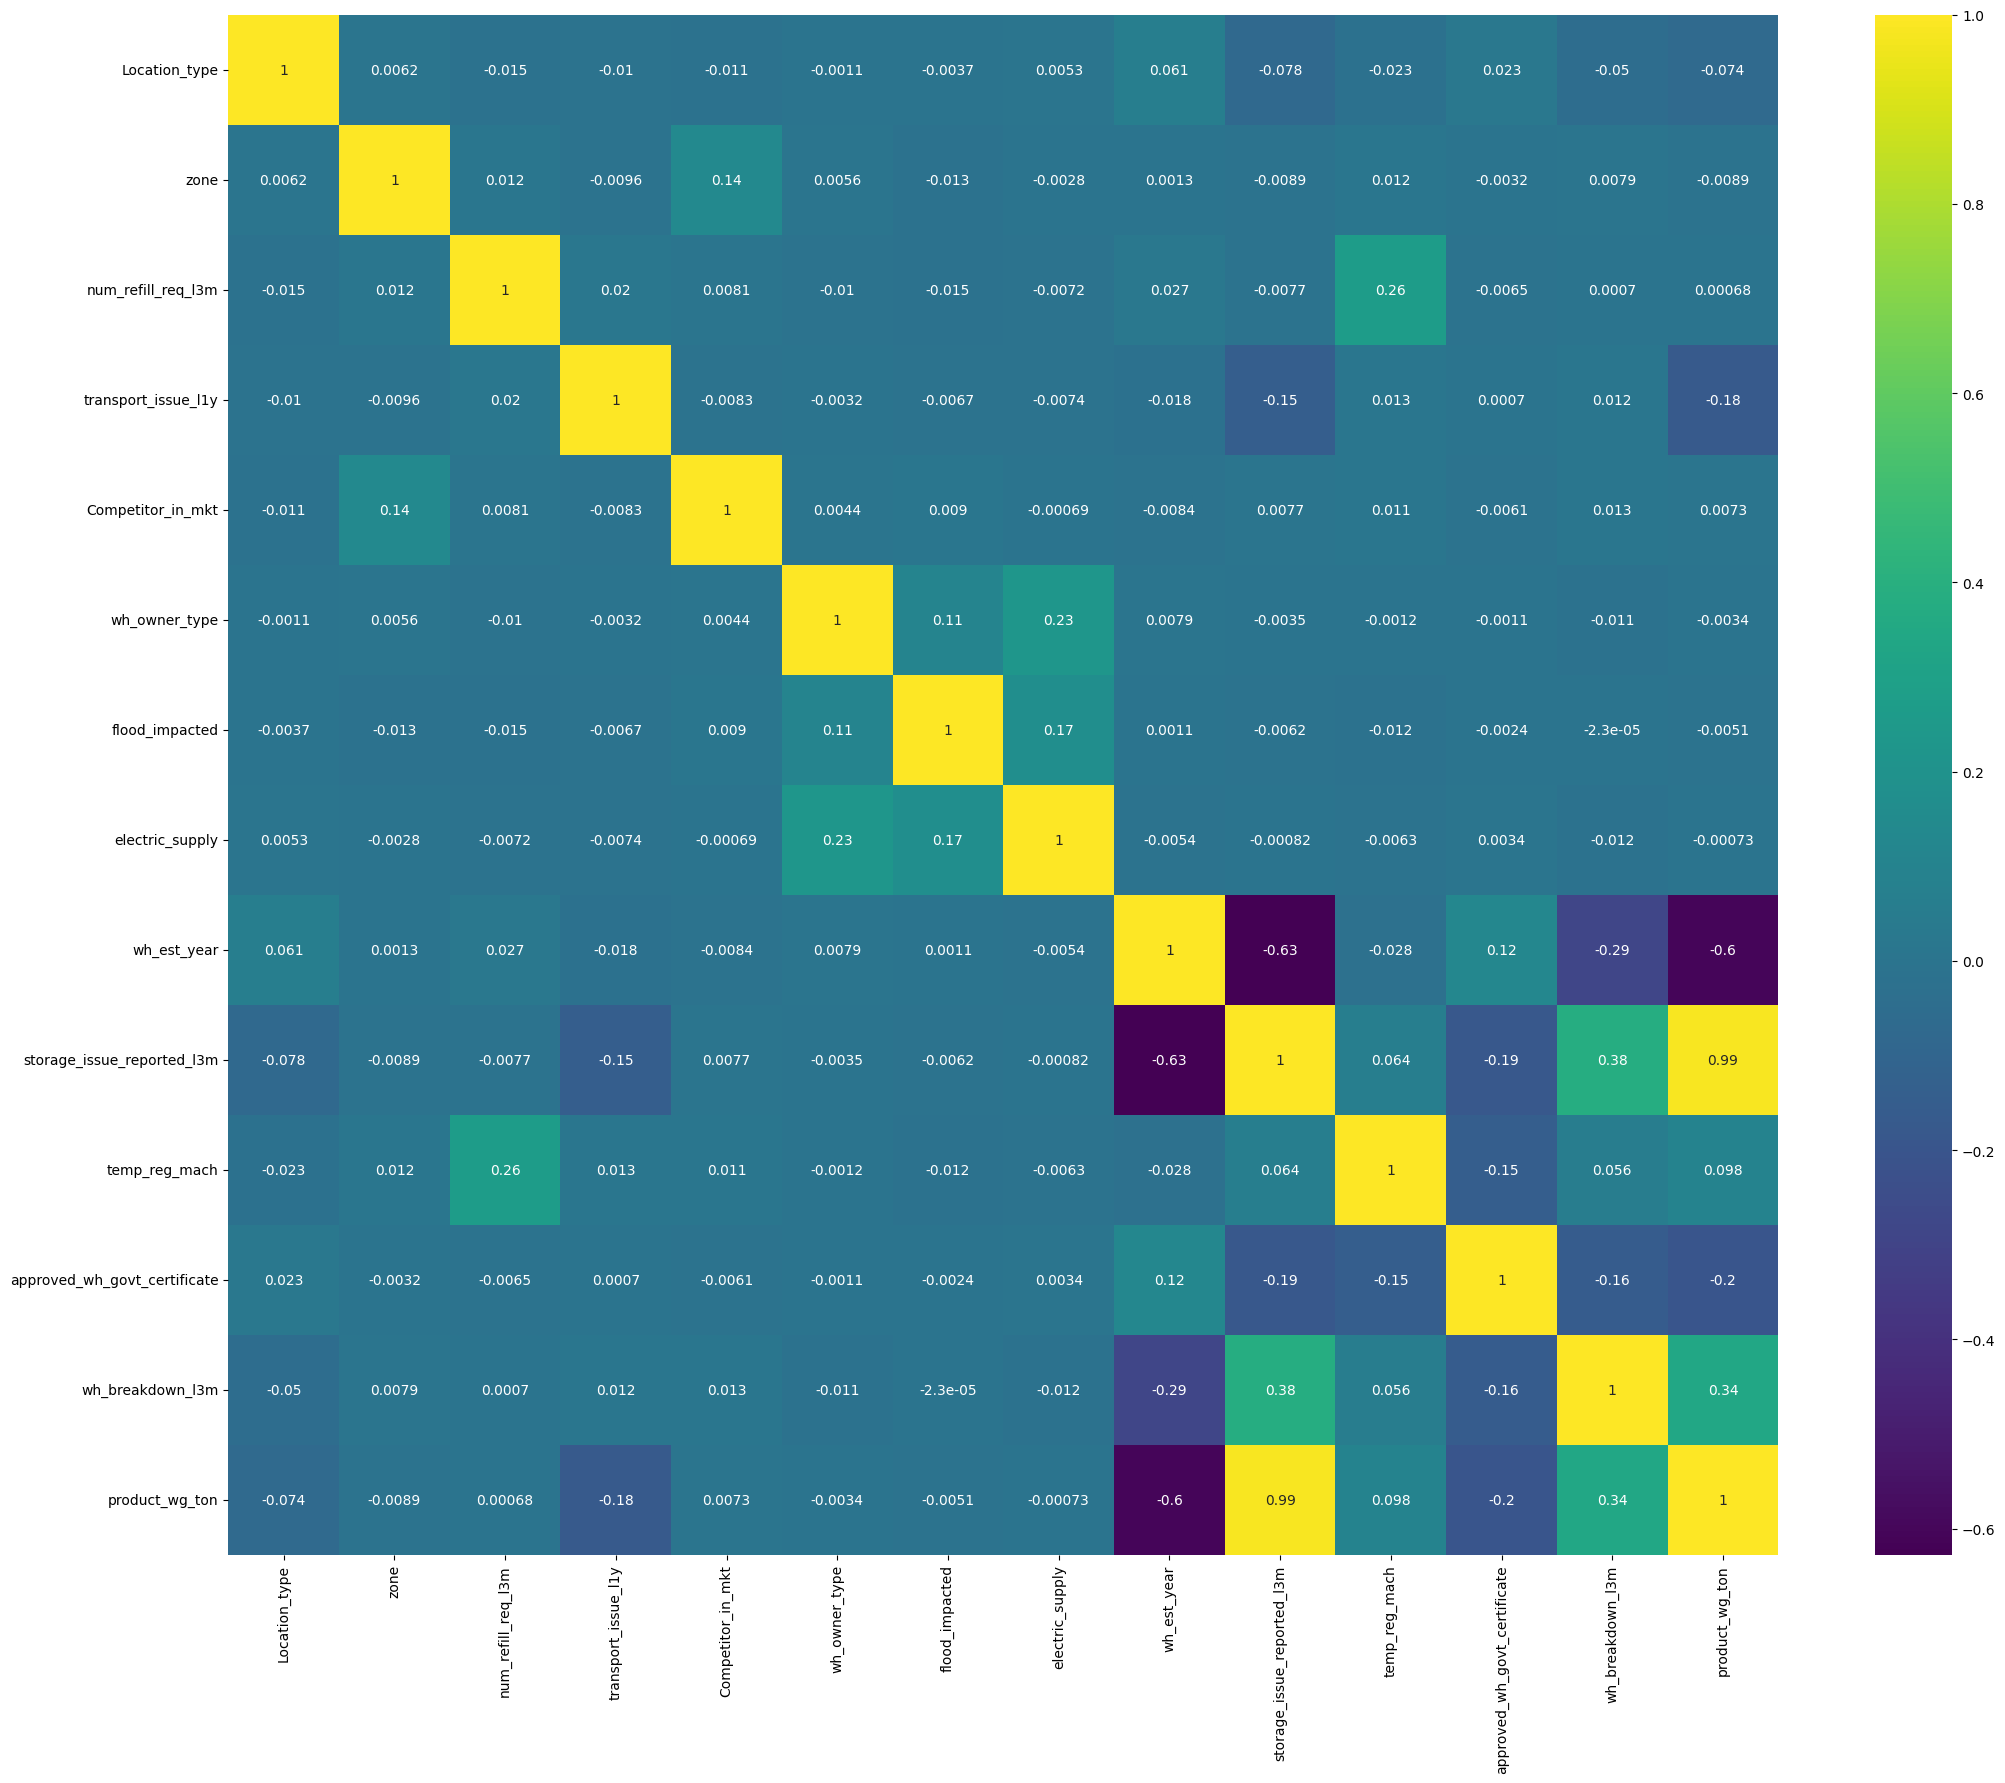

In [64]:
plt.figure(figsize = (25,20))
sns.heatmap(data.corr(),annot=True,cmap = 'viridis');

### Savinng CSv File 

In [65]:
data.to_csv('Df.csv')

### PCA Before Scaline Technique

In [66]:
from sklearn.decomposition import PCA

In [67]:
def custom_PCA(X):
    n_com = len(X.columns)
    
    for i in range(1,n_com):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)      # evr = Explained Variance Ratio
        if evr[i-1] > 0.9:
            pcs = i
            break
    print('Explained Variance Ratio After PCA : ',evr)
    # Creating DataFrame of Principal Components
    col = []
    for j in range(1,pcs+1):
        col.append('PC'+ str(j))
    pca_df = pd.DataFrame(p_comp,columns = col)
    return pca_df

In [68]:
pca_df = custom_PCA(data.drop('product_wg_ton', axis=1))

Explained Variance Ratio After PCA :  [0.76145415 0.88030615 0.9326026 ]


In [69]:
pca_df.head()

,PC1,PC2,PC3
0,-3.486431,1.914239,1.030557
1,-11.760095,5.669768,3.970381
2,0.231291,0.265035,3.072681
3,-0.074165,0.309896,-2.986220
4,1.003663,-0.111851,1.117946


In [70]:
pca_df = pca_df.join(df['product_wg_ton'], how = 'left')
pca_df.head()

,PC1,PC2,PC3,product_wg_ton
0,-3.486431,1.914239,1.030557,17115
1,-11.760095,5.669768,3.970381,5074
2,0.231291,0.265035,3.072681,23137
3,-0.074165,0.309896,-2.986220,22115
4,1.003663,-0.111851,1.117946,24071


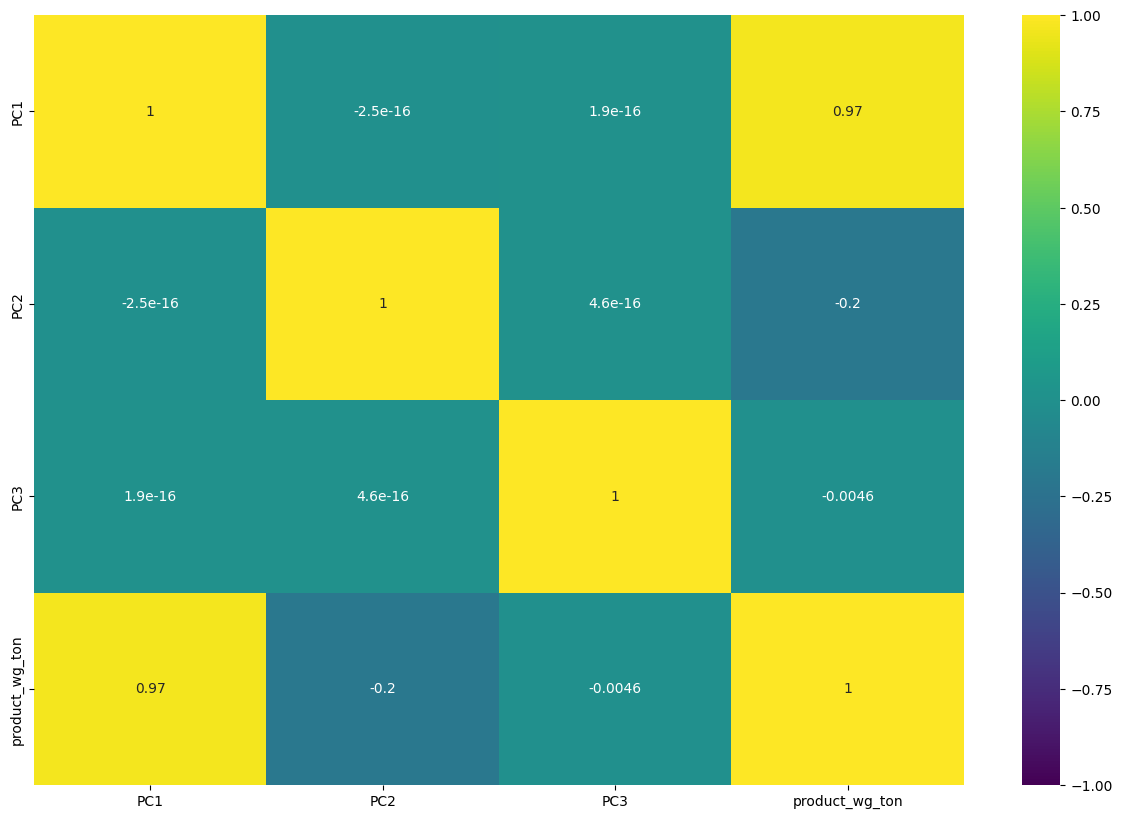

In [71]:
plt.subplots(figsize=(15,10))
sns.heatmap(pca_df.corr(),annot=True,cmap='viridis',center = 0,vmax = 1,vmin = -1);

### PCA After Feature Scaling Technique

In [72]:
from sklearn.preprocessing import StandardScaler
def custom_PCA(X):
    n_com = len(X.columns)
    
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    for i in range(1,n_com):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)      # evr = Explained Variance Ratio
        if evr[i-1] > 0.9:
            pcs = i
            break
    print('Explained Variance Ratio After PCA : ',evr)
    # Creating DataFrame of Principal Components
    col = []
    for j in range(1,pcs+1):
        col.append('PC'+ str(j))
    pca_df = pd.DataFrame(p_comp,columns = col)
    return pca_df

In [73]:
pca_df = custom_PCA(data.drop('product_wg_ton', axis=1))

Explained Variance Ratio After PCA :  [0.15321413 0.2570078  0.35579374 0.44346308 0.52215149 0.59807412
 0.66953421 0.73878242 0.8044847  0.86300672 0.92014571]


In [74]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.843006,-0.274046,-0.262474,0.174224,1.658578,2.146173,2.023145,-0.719693,-1.859292,-1.207053,1.050360
1,-0.663593,1.185237,-0.764416,0.038806,-0.225968,-0.636898,1.901634,-0.803960,1.465272,-0.223642,-0.039140
2,1.028765,-0.144671,-1.008412,0.854175,-0.162439,-0.791676,1.626183,-0.589958,0.603535,1.677443,0.663900
3,0.107058,-2.297653,1.389401,-1.884229,1.852289,-1.127413,-0.103984,0.542750,-0.028226,0.071529,-0.842919
4,0.189247,2.699515,-0.471436,-1.303908,0.298329,-0.068874,-0.736816,1.968721,-0.581153,1.220532,1.073205


In [75]:
pca_df = pca_df.join(df['product_wg_ton'], how = 'left')

In [76]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,product_wg_ton
0,0.843006,-0.274046,-0.262474,0.174224,1.658578,2.146173,2.023145,-0.719693,-1.859292,-1.207053,1.050360,17115
1,-0.663593,1.185237,-0.764416,0.038806,-0.225968,-0.636898,1.901634,-0.803960,1.465272,-0.223642,-0.039140,5074
2,1.028765,-0.144671,-1.008412,0.854175,-0.162439,-0.791676,1.626183,-0.589958,0.603535,1.677443,0.663900,23137
3,0.107058,-2.297653,1.389401,-1.884229,1.852289,-1.127413,-0.103984,0.542750,-0.028226,0.071529,-0.842919,22115
4,0.189247,2.699515,-0.471436,-1.303908,0.298329,-0.068874,-0.736816,1.968721,-0.581153,1.220532,1.073205,24071


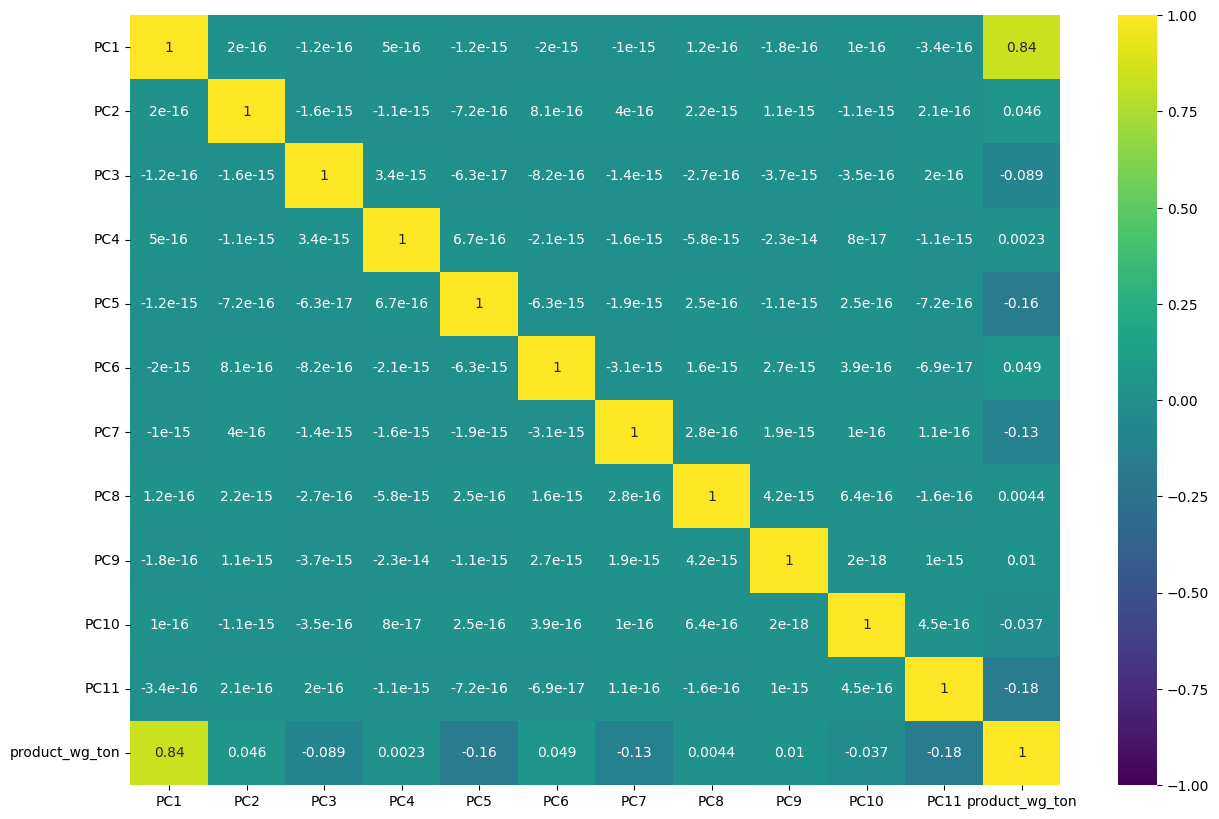

In [77]:
plt.subplots(figsize=(15,10))
sns.heatmap(pca_df.corr(),annot=True,cmap='viridis',center = 0,vmax = 1,vmin = -1);

In [78]:
sree_data = [0.15321413,0.2570078,0.35579374,0.44346308,0.52215149,0.59807412,
             0.66953421,0.73878242,0.8044847,0.86300672,0.92014571]

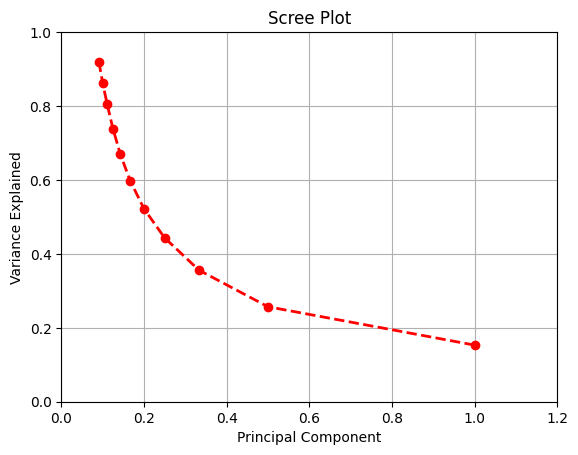

In [79]:
PC_values = np.arange(11) + 1
plt.plot(1/PC_values,sree_data, 'o--', linewidth=2, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0,1)
plt.xlim(0,1.2)
plt.grid()
plt.show()

### Confirmatory Factor Analysis

In [80]:
ndata = data
ndata.drop(['product_wg_ton'],axis=1,inplace=True)

In [81]:
ndata.head()

,Location_type,zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,wh_owner_type,flood_impacted,electric_supply,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m
0,0,3,3,1,2,0,0,1,2009.0,13,0,0,5
1,1,1,0,0,4,1,0,1,2009.0,4,0,0,3
2,1,2,1,0,4,1,0,0,2009.0,17,0,0,6
3,1,1,7,4,2,0,0,0,2009.0,17,1,1,3
4,1,1,3,1,2,1,1,1,2009.0,18,0,4,6


In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
from factor_analyzer import FactorAnalyzer
scaler = StandardScaler()
scaled = scaler.fit_transform(ndata)

In [84]:
fa= FactorAnalyzer(n_factors=11,rotation='varimax')

In [85]:
fa.fit(ndata)

FactorAnalyzer(n_factors=11, rotation='varimax', rotation_kwargs={})

In [86]:
loadings = fa.loadings_

In [87]:
ev,v = fa.get_eigenvalues()

In [88]:
ev

array([1.99178371, 1.34931774, 1.28421714, 1.1397014 , 1.02294931,
       0.9869943 , 0.92898118, 0.90022661, 0.85412975, 0.7607862 ,
       0.74280683, 0.69978071, 0.33832511])

In [89]:
xvals = range(1,ndata.shape[1]+1)

In [90]:
xvals

range(1, 14)

In [91]:
cfa = pd.DataFrame(loadings)
cfa

,0,1,2,3,4,5,6,7,8,9,10
0,-0.055915,-0.020302,0.001565,-0.018194,-0.014201,-0.004091,-0.011980,-0.005143,-0.167054,0.000031,-0.000518
1,0.001736,0.014690,0.004612,0.002972,-0.006032,0.384837,0.017183,-0.037148,-0.048588,-0.003469,-0.035363
2,-0.016055,0.532860,-0.012761,-0.060515,0.020836,0.014111,0.039441,-0.006690,0.031482,0.037375,0.000289
3,-0.028033,0.017901,-0.006293,0.002663,0.446507,-0.015343,0.007698,-0.005624,0.031692,0.000073,-0.000004
4,0.000711,0.003598,-0.001035,0.004228,-0.009123,0.380760,-0.012300,0.033646,0.058366,0.003232,0.035385
5,-0.011498,-0.007548,0.469872,0.005077,-0.002063,0.010636,-0.004551,-0.026960,0.016130,-0.012036,0.021505
6,-0.006618,-0.018240,0.249518,0.005000,-0.009065,-0.005090,0.003338,0.296550,0.020135,-0.000137,0.000972
7,0.011765,0.001038,0.500327,-0.009850,-0.004607,-0.005879,-0.003110,0.146767,-0.033965,0.015221,-0.027930
8,-0.786033,0.021913,0.001837,-0.068936,-0.084785,-0.007533,0.036694,-0.009830,-0.091408,0.036729,0.011844
9,0.801881,0.015932,0.002877,0.181054,-0.295359,-0.015684,0.137868,-0.031768,0.195981,0.059106,0.019095


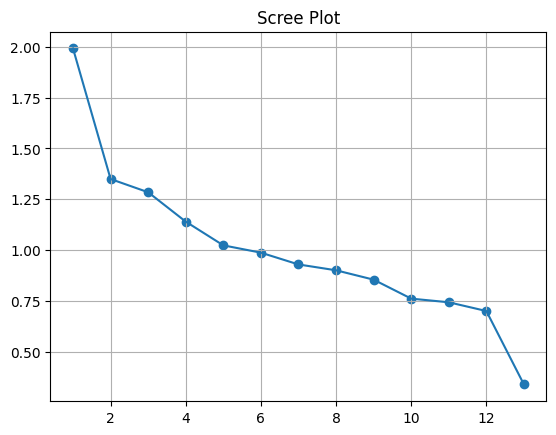

In [92]:
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.grid()
plt.title('Scree Plot')
plt.show()

### Machine Learning Regression Models

In [93]:
X = pca_df.iloc[:,:-1]
y = pca_df.iloc[:,-1:]

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [95]:
!pip install XGBoost
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

Defaulting to user installation because normal site-packages is not writeable


In [96]:
def CVFold(models):
    score = cross_val_score(model,X_test,y_test,cv=CV,scoring = 'r2')
    print("Baseline mean R-squared from K-fold CV of {} is {}".format(model, round(np.mean(score), 4)))

In [97]:
CV = KFold(n_splits=5, shuffle=True, random_state=23)

In [98]:
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), RandomForestRegressor()]
for model in models:
    CVFold(models)

Baseline mean R-squared from K-fold CV of LinearRegression() is 0.7856
Baseline mean R-squared from K-fold CV of Ridge() is 0.7856
Baseline mean R-squared from K-fold CV of Lasso() is 0.7856
Baseline mean R-squared from K-fold CV of DecisionTreeRegressor() is 0.7448
Baseline mean R-squared from K-fold CV of RandomForestRegressor() is 0.879
Baseline mean R-squared from K-fold CV of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=No

### Baseline Accuracy : Random Forest with 87.96 %

In [99]:
def TestXGBParams(**params):
    score = cross_val_score(RandomForestRegressor(**params, n_jobs=-1, random_state=23), X_test, y_test, cv= CV, scoring="r2")
    print("Mean R-squared from K-fold CV with {} is {}".format(params, round(np.mean(score), 4)))

### Using Hyper Parameter Tuning 

In [100]:
estimators = [1,2,4,8,16,32,64,120,125,127,130,133,140,150,200,256]
for n in estimators:
    TestXGBParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 1} is 0.7298
Mean R-squared from K-fold CV with {'n_estimators': 2} is 0.8032
Mean R-squared from K-fold CV with {'n_estimators': 4} is 0.8402
Mean R-squared from K-fold CV with {'n_estimators': 8} is 0.8586
Mean R-squared from K-fold CV with {'n_estimators': 16} is 0.8702
Mean R-squared from K-fold CV with {'n_estimators': 32} is 0.8756
Mean R-squared from K-fold CV with {'n_estimators': 64} is 0.8786
Mean R-squared from K-fold CV with {'n_estimators': 120} is 0.8799
Mean R-squared from K-fold CV with {'n_estimators': 125} is 0.8798
Mean R-squared from K-fold CV with {'n_estimators': 127} is 0.8799
Mean R-squared from K-fold CV with {'n_estimators': 130} is 0.8799
Mean R-squared from K-fold CV with {'n_estimators': 133} is 0.8799
Mean R-squared from K-fold CV with {'n_estimators': 140} is 0.8799
Mean R-squared from K-fold CV with {'n_estimators': 150} is 0.8801
Mean R-squared from K-fold CV with {'n_estimators': 200} is 0.8803
Mean R

In [101]:
depths = [1, 2, 4,6,8,10,12,14,16,20,25]
for n in depths:
    TestXGBParams(n_estimators = 256, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 1} is 0.5545
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 2} is 0.6964
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 4} is 0.7922
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 6} is 0.8429
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 8} is 0.8649
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 10} is 0.8751
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 12} is 0.8786
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 14} is 0.8798
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 16} is 0.8803
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 20} is 0.8804
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804


In [102]:
rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for n in rates:
    TestXGBParams(n_estimators = 256, max_depth = 25)

Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804
Mean R-squared from K-fold CV with {'n_estimators': 256, 'max_depth': 25} is 0.8804


In [103]:
model = RandomForestRegressor(n_estimators = 256, max_depth = 25,n_jobs=-1, random_state = 23)

In [104]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=256, n_jobs=-1,
                      random_state=23)

In [105]:
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test,y_pred)

print('Our Optimized RandomForest Regression Model got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Our Optimized RandomForest Regression Model got the following scores on the test set:
R-squared: 0.9027124166726298
MSE: 13110553.97352176
RMSE: 3620.8498965742506
MAE: 2718.8423477939114


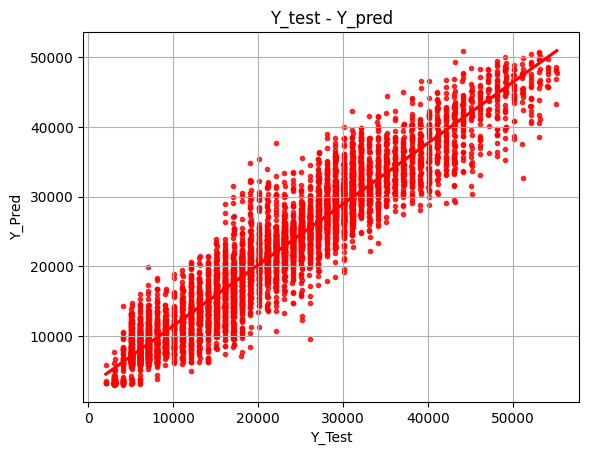

In [106]:
sns.regplot(x=y_test,y=y_pred,marker='.',color='red')
plt.xlabel('y_test')
plt.title('Y_test - Y_pred')
plt.xlabel('Y_Test')
plt.ylabel('Y_Pred')
plt.grid()
plt.show()

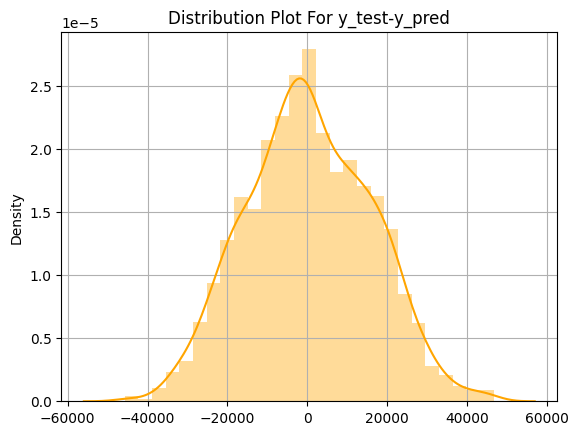

In [107]:
# Converting array into DataFrame
y_pred = pd.DataFrame(y_pred,columns = y_test.columns) 
sns.distplot(y_test-y_pred,color='orange')
plt.title('Distribution Plot For y_test-y_pred')
plt.grid()
plt.show()

### Conclusion:

1. The Test accuracy of Training and Testing shows a good agrrement value for all the models.

2. Out of Six Models, The Random Forest Regression Model gives highest accuracy score of 90.27 %

In [108]:
ml_score = {'Linear Regresson': 78.56,'Ridge': 78.56,'Lasso': 78.56,'Decision Tree Regressor': 74.49,
           'XGB Regressor': 87.87,'Random Forest Regressor': 90.27}

In [109]:
ml_data = pd.DataFrame({'Linear Regresson': 78.56,'Ridge': 78.56,'Lasso': 78.56,'Decision Tree Regressor': 74.49,
           'XGB Regressor': 87.87,'Random Forest Regressor': 90.27},index = ['LR','RD','LS','DT','XGB','RF'])

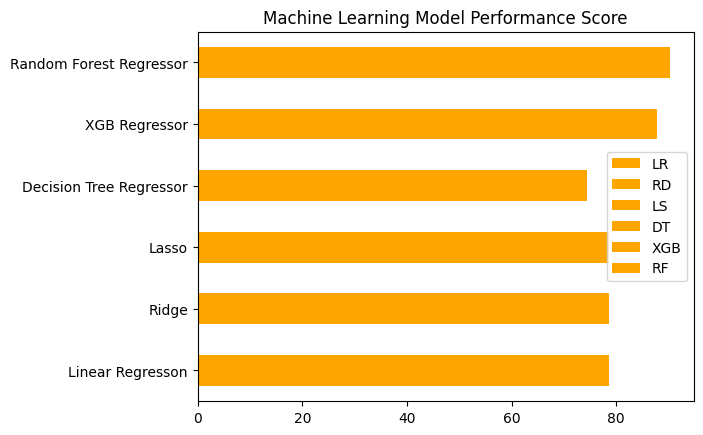

In [110]:
ml_data.T.plot(kind='barh',color = 'orange')
plt.title('Machine Learning Model Performance Score')
plt.show()

### Model Building Technique Using ANN

In [111]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [112]:
model = Sequential()
model.add(Dense(128, input_dim=11, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [113]:
X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
11626,0.715035,0.573198,0.922998,-0.626952,-0.720166,-0.477122,0.407062,-1.045490,-0.539096,0.169934,1.083912
21332,-0.839206,0.076242,-1.373931,2.158234,1.169844,-0.416791,-0.649869,0.349519,0.210379,-1.310422,0.020504
18159,-1.397478,0.072888,2.429312,-1.307038,0.323534,-0.196461,-0.185887,-0.211464,2.248763,-0.117395,-0.071251
6220,0.796034,0.177361,-1.600790,-0.358208,-0.598183,-0.524606,1.022198,-0.222577,-0.786266,-1.253708,0.311830
17830,-0.337968,-1.356324,-1.521818,-0.235459,3.879271,2.421323,0.061784,0.610030,0.826238,0.249448,0.038501
...,...,...,...,...,...,...,...,...,...,...,...
11964,0.698620,0.801075,0.202807,-0.082646,-0.522624,0.432853,-2.084075,-0.130998,1.385873,0.206450,0.785489
21575,-0.568645,0.680039,0.837320,1.434438,-0.812960,-0.299631,0.894424,-1.055204,-0.039658,-0.438877,-0.765085
5390,-0.121897,1.224617,-0.961317,-0.018525,0.330042,-0.638997,1.018958,-0.702448,1.474645,-0.241578,-0.306065
860,0.097169,-1.609464,-0.563118,-0.757060,1.113859,3.622663,-0.699059,0.564723,0.254765,0.053445,-0.681886


In [114]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs = 100)

Epoch 1/100
340/340 [==============================] - 1s 2ms/step - loss: 606570944.0000 - mse: 606570944.0000 - val_loss: 541956544.0000 - val_mse: 541956544.0000
Epoch 2/100
340/340 [==============================] - 1s 2ms/step - loss: 375898112.0000 - mse: 375898112.0000 - val_loss: 180969456.0000 - val_mse: 180969456.0000
Epoch 3/100
340/340 [==============================] - 1s 2ms/step - loss: 89910776.0000 - mse: 89910776.0000 - val_loss: 42494044.0000 - val_mse: 42494044.0000
Epoch 4/100
340/340 [==============================] - 1s 2ms/step - loss: 35359544.0000 - mse: 35359544.0000 - val_loss: 30444346.0000 - val_mse: 30444346.0000
Epoch 5/100
340/340 [==============================] - 1s 2ms/step - loss: 28886044.0000 - mse: 28886044.0000 - val_loss: 28087690.0000 - val_mse: 28087690.0000
Epoch 6/100
340/340 [==============================] - 1s 2ms/step - loss: 27476358.0000 - mse: 27476358.0000 - val_loss: 27368062.0000 - val_mse: 27368062.0000
Epoch 7/100
340/340 [=====

340/340 [==============================] - 0s 1ms/step - loss: 21974828.0000 - mse: 21974828.0000 - val_loss: 22504374.0000 - val_mse: 22504374.0000
Epoch 52/100
340/340 [==============================] - 0s 1ms/step - loss: 21937138.0000 - mse: 21937138.0000 - val_loss: 22202586.0000 - val_mse: 22202586.0000
Epoch 53/100
340/340 [==============================] - 1s 1ms/step - loss: 21843082.0000 - mse: 21843082.0000 - val_loss: 22155846.0000 - val_mse: 22155846.0000
Epoch 54/100
340/340 [==============================] - 1s 1ms/step - loss: 21744200.0000 - mse: 21744200.0000 - val_loss: 22128018.0000 - val_mse: 22128018.0000
Epoch 55/100
340/340 [==============================] - 0s 1ms/step - loss: 21639982.0000 - mse: 21639982.0000 - val_loss: 21969094.0000 - val_mse: 21969094.0000
Epoch 56/100
340/340 [==============================] - 1s 1ms/step - loss: 21519042.0000 - mse: 21519042.0000 - val_loss: 21778742.0000 - val_mse: 21778742.0000
Epoch 57/100
340/340 [===================

In [115]:
#Predict on test data
predictions = model.predict(X_test[:10])
print("*"*80)
print("Predicted values are: ", predictions)
print("*"*80)
print("Real values are: ", y_test[:10])
print("*"*80)

1/1 [==============================] - 0s 87ms/step
********************************************************************************
Predicted values are:  [[22637.729 ]
 [34311.047 ]
 [11380.383 ]
 [ 9697.141 ]
 [31514.104 ]
 [10741.072 ]
 [38177.28  ]
 [34910.125 ]
 [38903.16  ]
 [ 7695.6484]]
********************************************************************************
Real values are:         product_wg_ton
6550            21080
10459           43082
16632           13132
5916             6129
19438           30097
13866            7133
14856           20123
6653            29076
17695           38124
12530            7107
********************************************************************************


In [116]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

208/208 [==============================] - 0s 966us/step - loss: 12914957.0000 - mse: 12914957.0000
Mean squared error from neural net:  12914957.0
Mean absolute error from neural net:  12914957.0


In [117]:
######################################################################
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

############################################################
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

##############################################
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators = 30, random_state=30)
model1.fit(X_train, y_train)

y_pred_RF = model.predict(X_test)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

#Feature ranking...
import pandas as pd
feature_list = list(X.columns)
feature_imp = pd.Series(model1.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Mean squared error from linear regression:  28805534.620508417
Mean absolute error from linear regression:  4269.934434409045
Mean squared error using decision tree:  27740208.989839897
Mean absolute error using decision tree:  3851.8974166039634
208/208 [==============================] - 0s 812us/step
Mean squared error using Random Forest:  12914955.72425792
Mean absolute error Using Random Forest:  2728.6519279210165
PC1     0.748395
PC11    0.057341
PC5     0.046332
PC3     0.035612
PC7     0.035235
PC6     0.020739
PC2     0.016699
PC4     0.012934
PC10    0.011395
PC8     0.007930
PC9     0.007387
dtype: float64


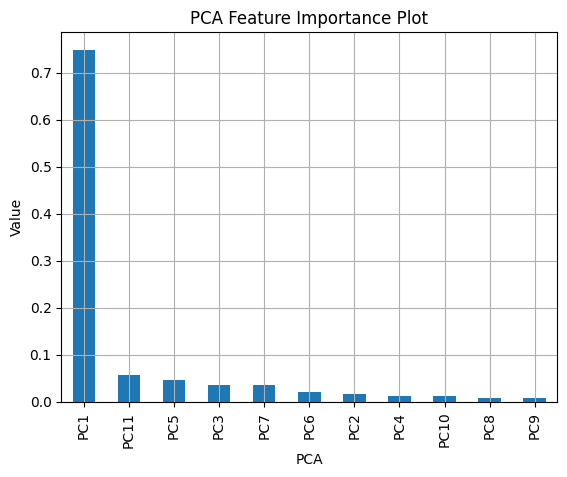

In [118]:
feature_imp.plot(kind='bar')
plt.title('PCA Feature Importance Plot')
plt.xlabel('PCA')
plt.ylabel('Value')
plt.grid()
plt.show()

### 1. The Design Model Can able to Predict demand patterns  with  90.27% of accuracy.

### 2. The Design Model also tested with Cross Validation Technique and using ANN

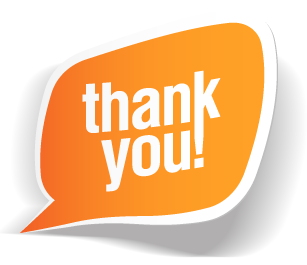